In [72]:
import os, json, glob, math
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

In [2]:
dir_dataset = "/mnt/nas/PYUSCT_train/dataset002/"

### 教師データのサンプル可視化

In [3]:
input_dataset = sorted(glob.glob( os.path.join(dir_dataset, "input/*.npy")))
output_dataset = sorted(glob.glob( os.path.join(dir_dataset, "output/*.npy")))

assert len(input_dataset) == len(output_dataset)
len(input_dataset)

10000

In [36]:
def func_envelope(ts):
    return abs(signal.hilbert(ts - ts.mean()))

In [65]:
def translate_circular(img):

    num_angle= img.shape[0]
    img_size = 2*img.shape[1]

    img_ = np.zeros((img_size, img_size), dtype=img.dtype)

    for i in range(img_size):
        for j in range(img_size):
            i_ = i - img_size //2
            j_ = j - img_size //2

            d = int(np.linalg.norm([i_, j_]))
            if d < img.shape[1]:
                k = ( int(( math.atan2(i_, j_) + np.pi ) // (2*np.pi/num_angle)) )% num_angle

                img_[i, j] = img[k, d]
    
    return img_

### 教師データ入出力画像を保存

In [38]:
np.apply_along_axis?

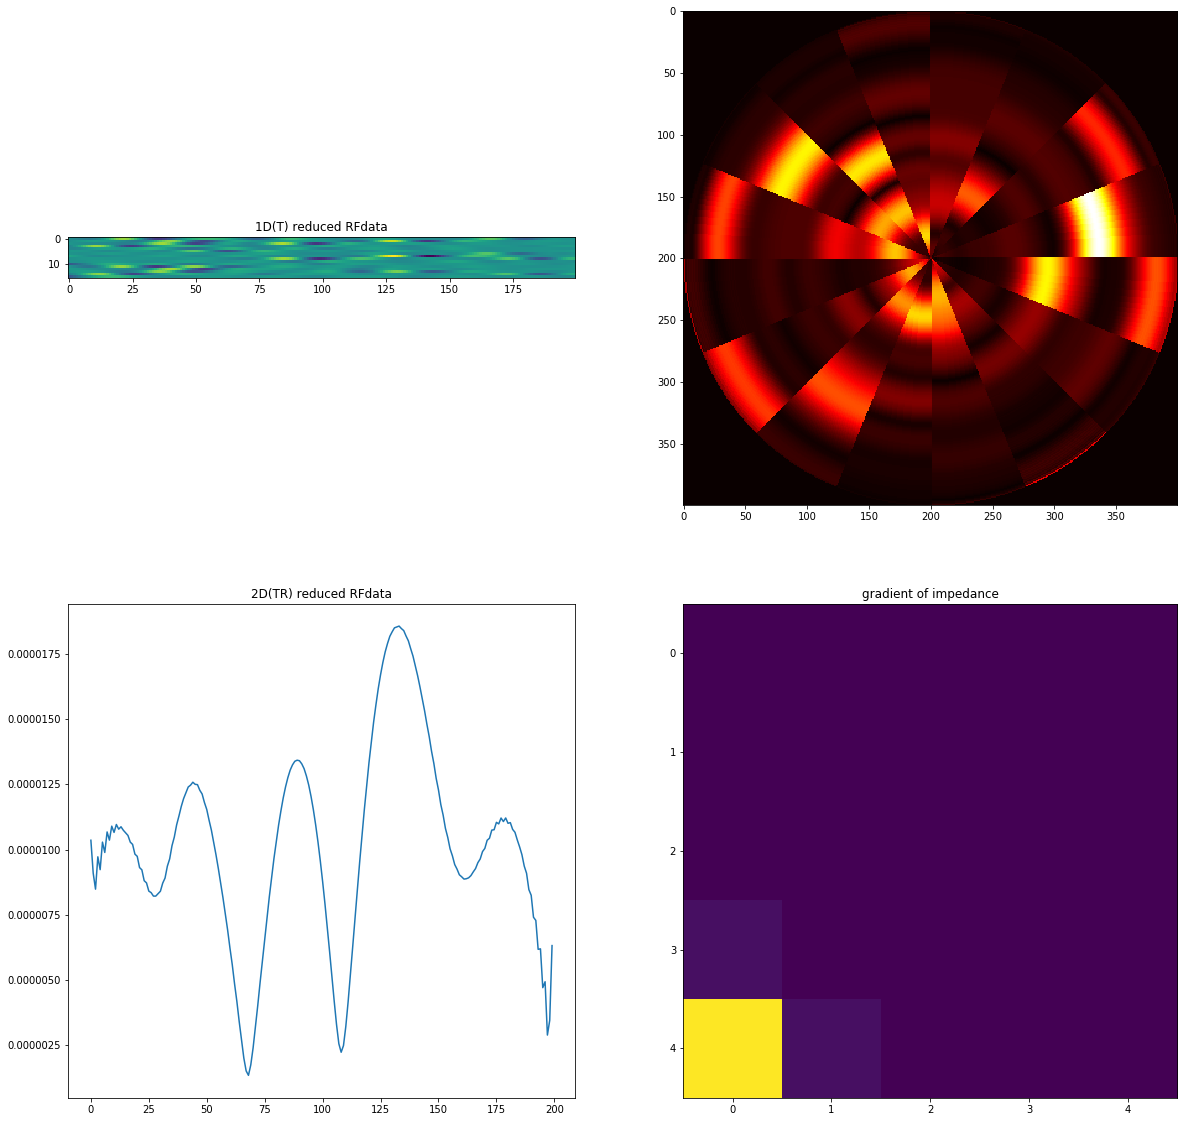

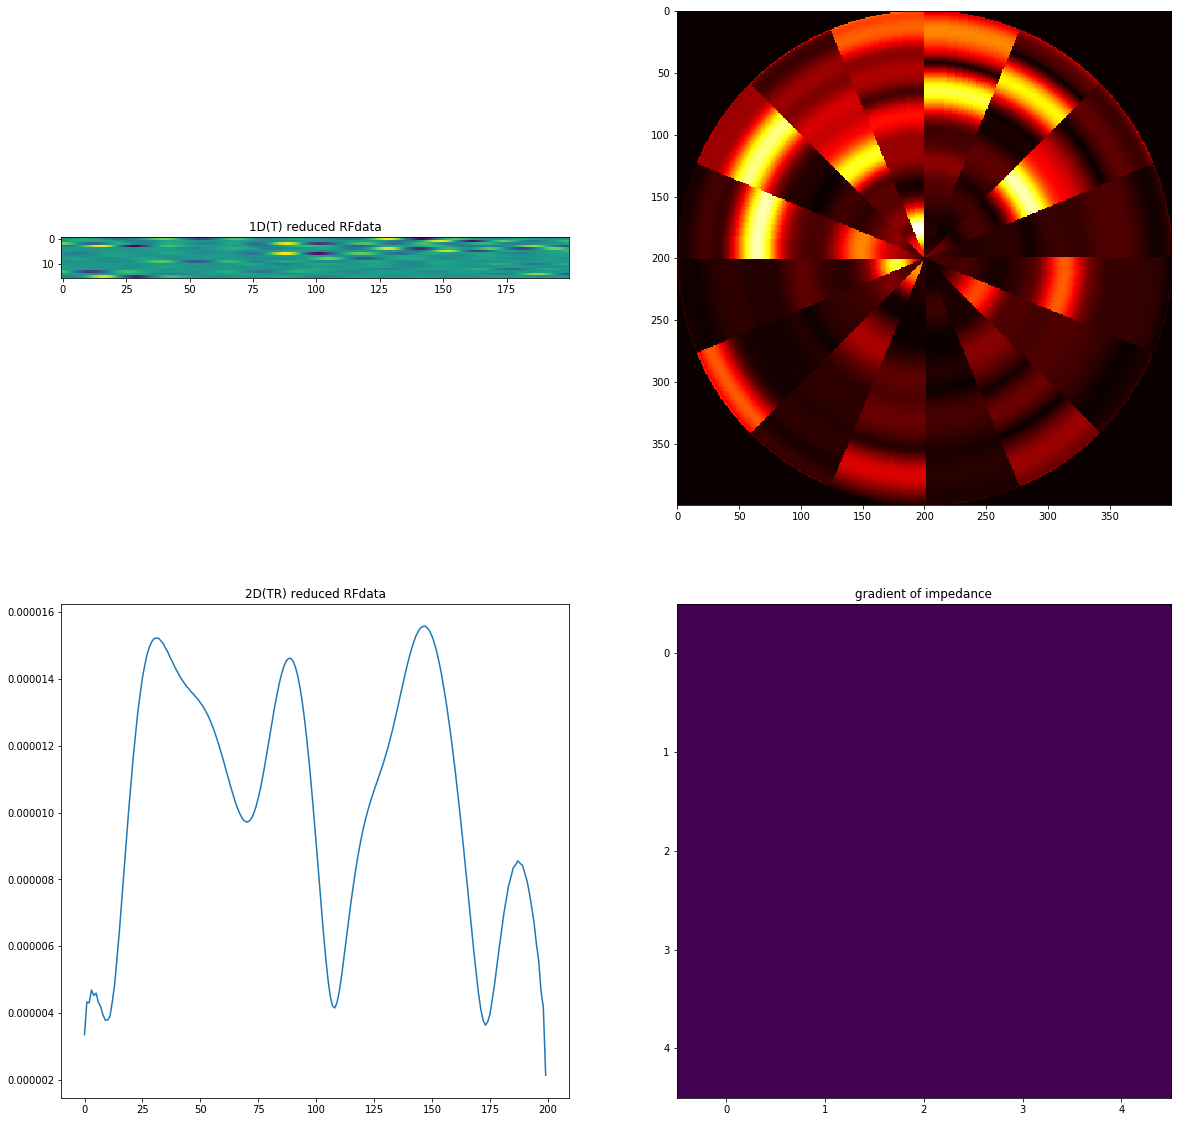

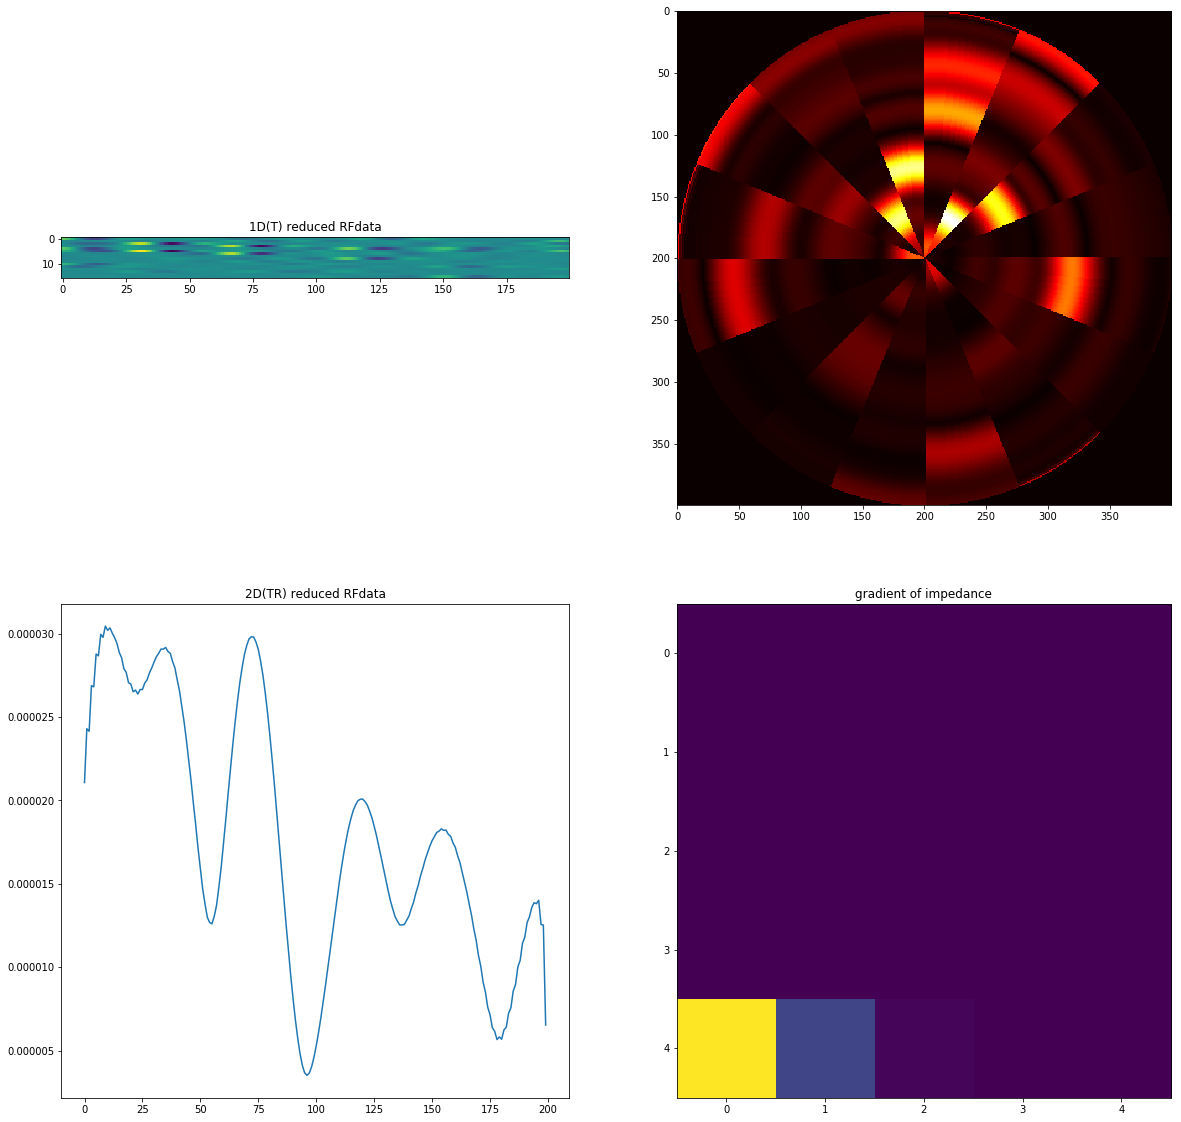

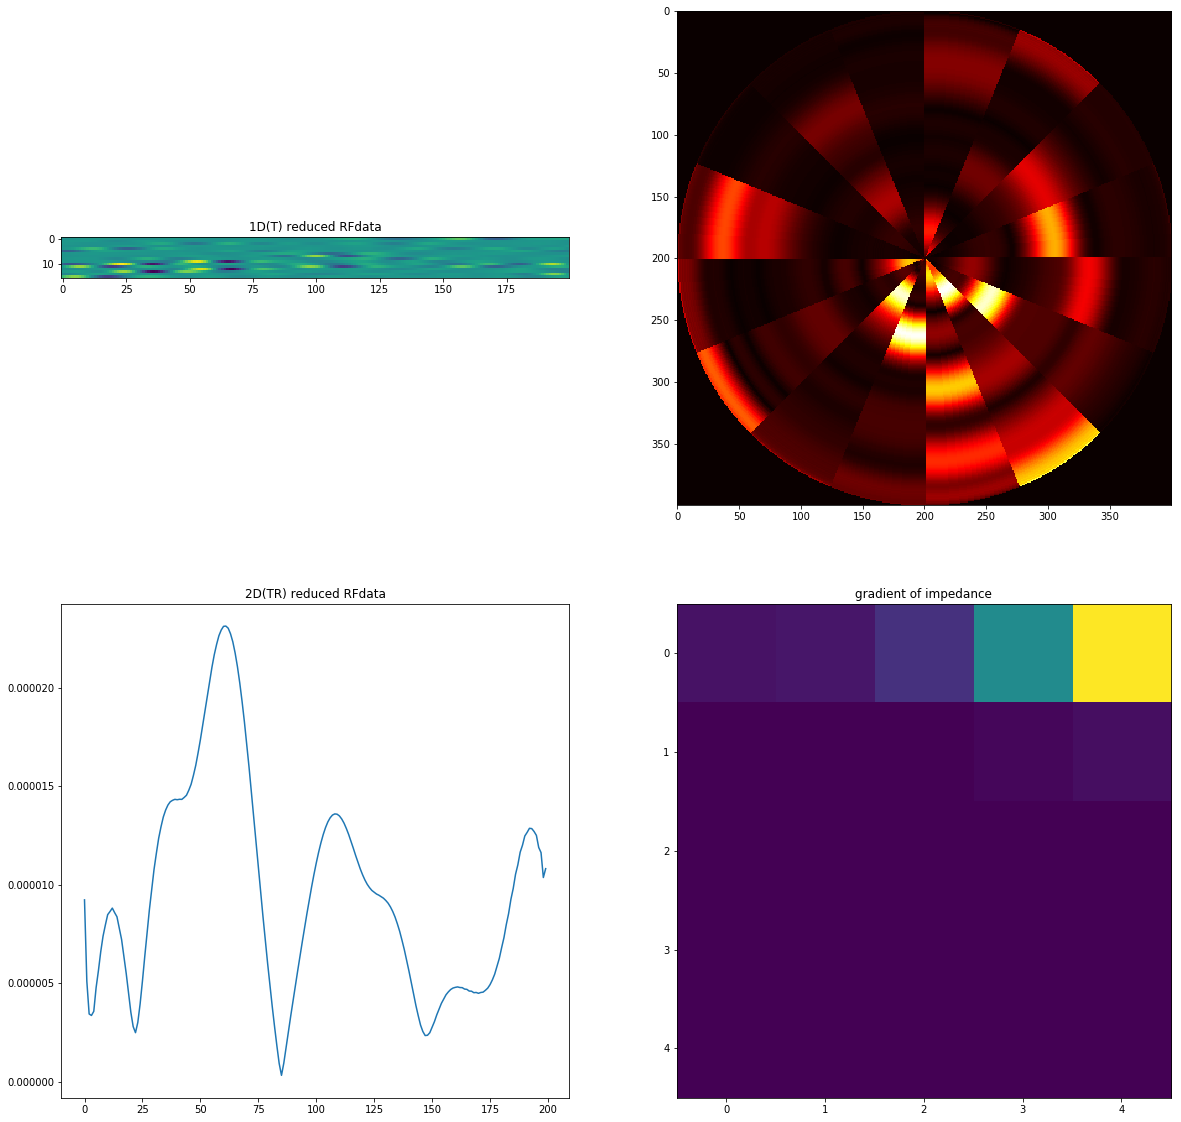

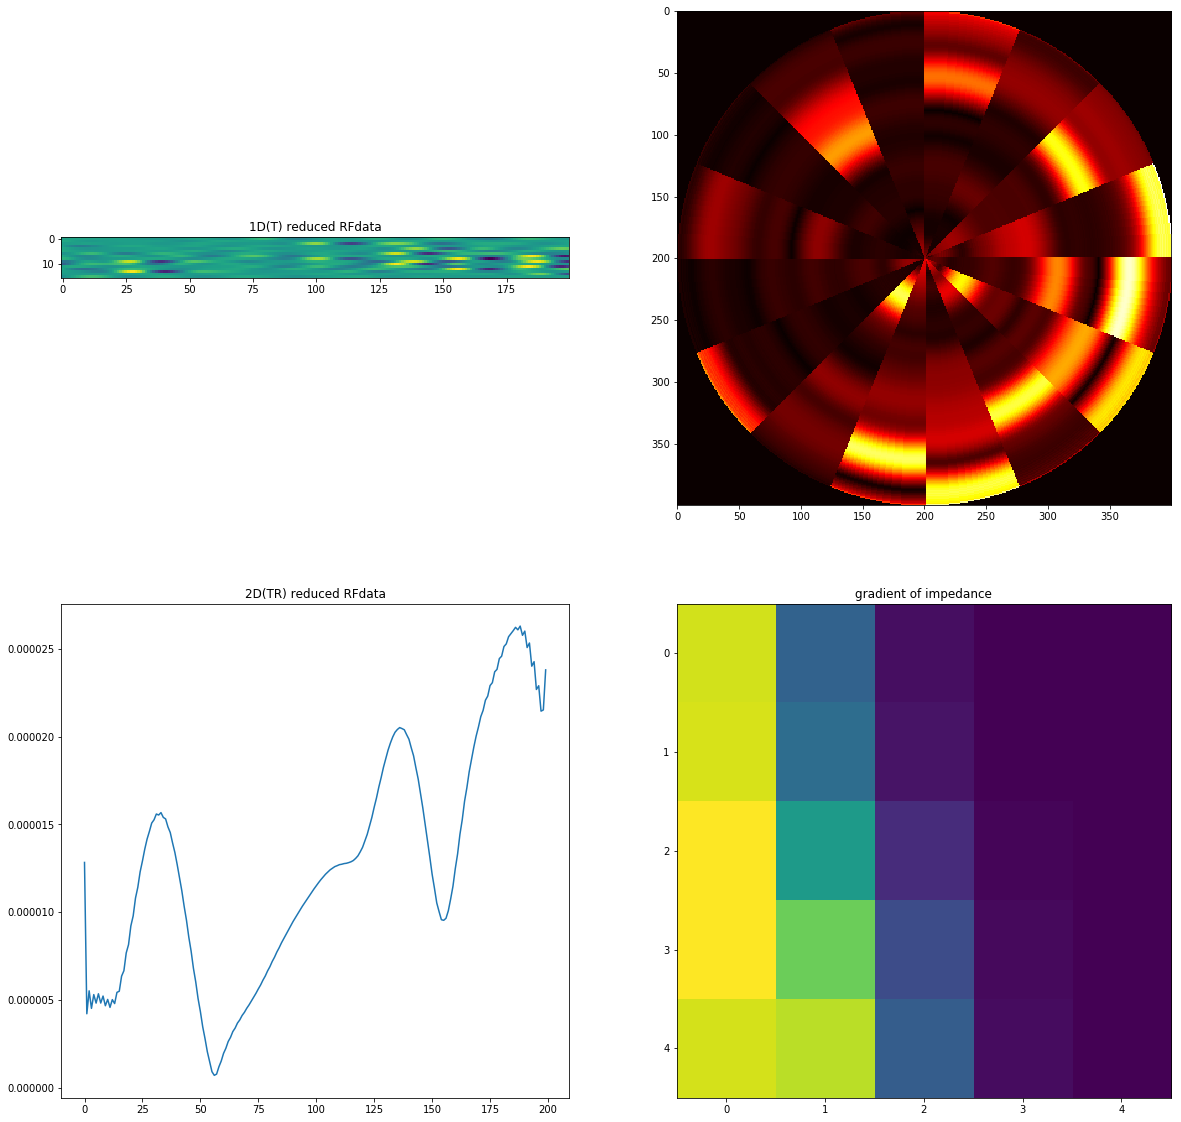

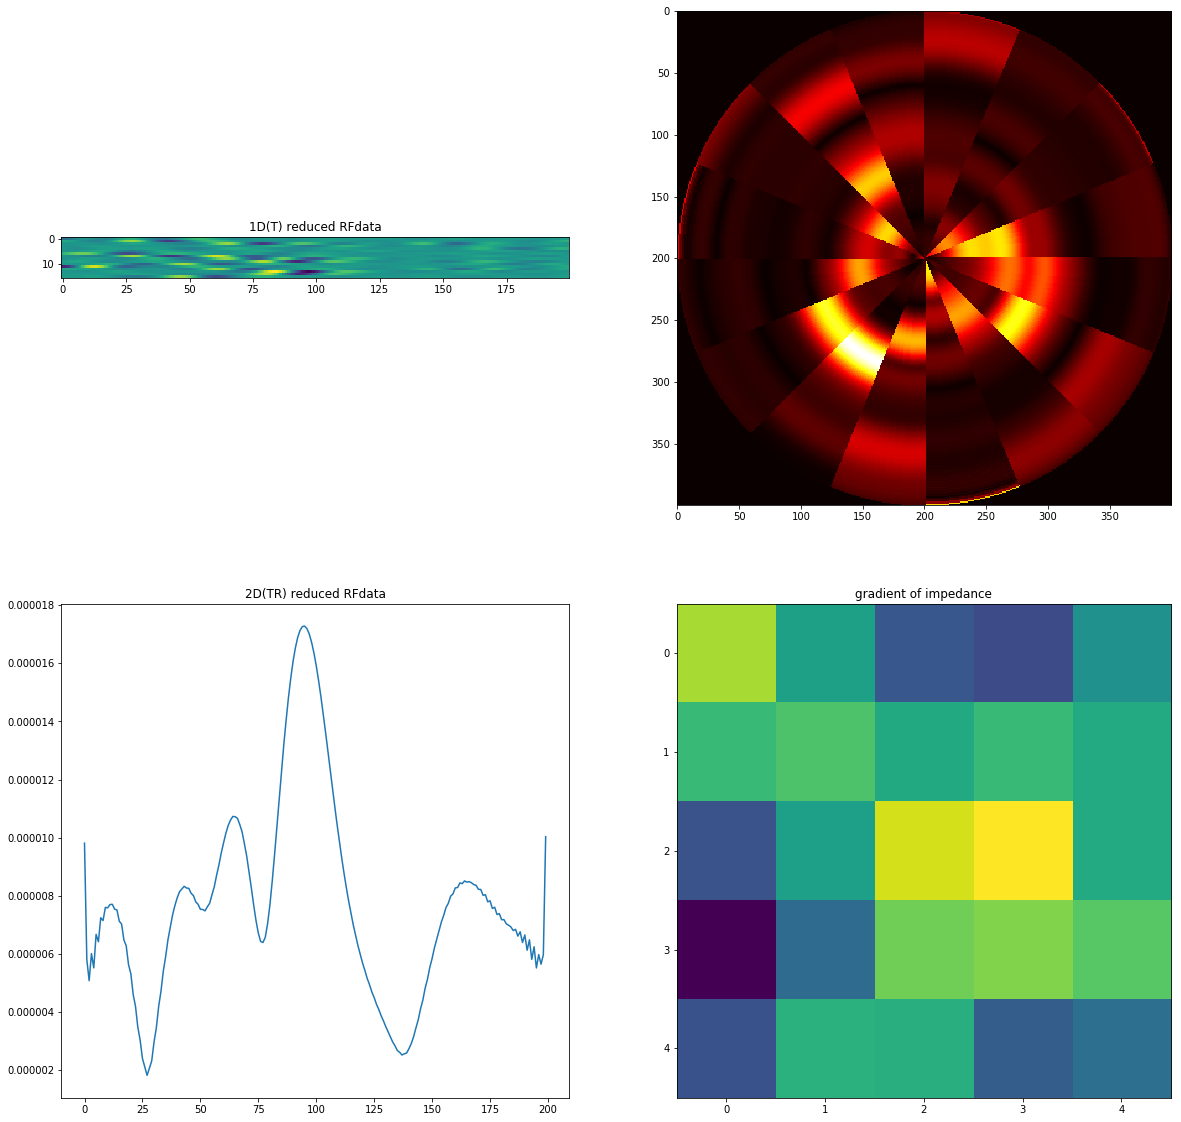

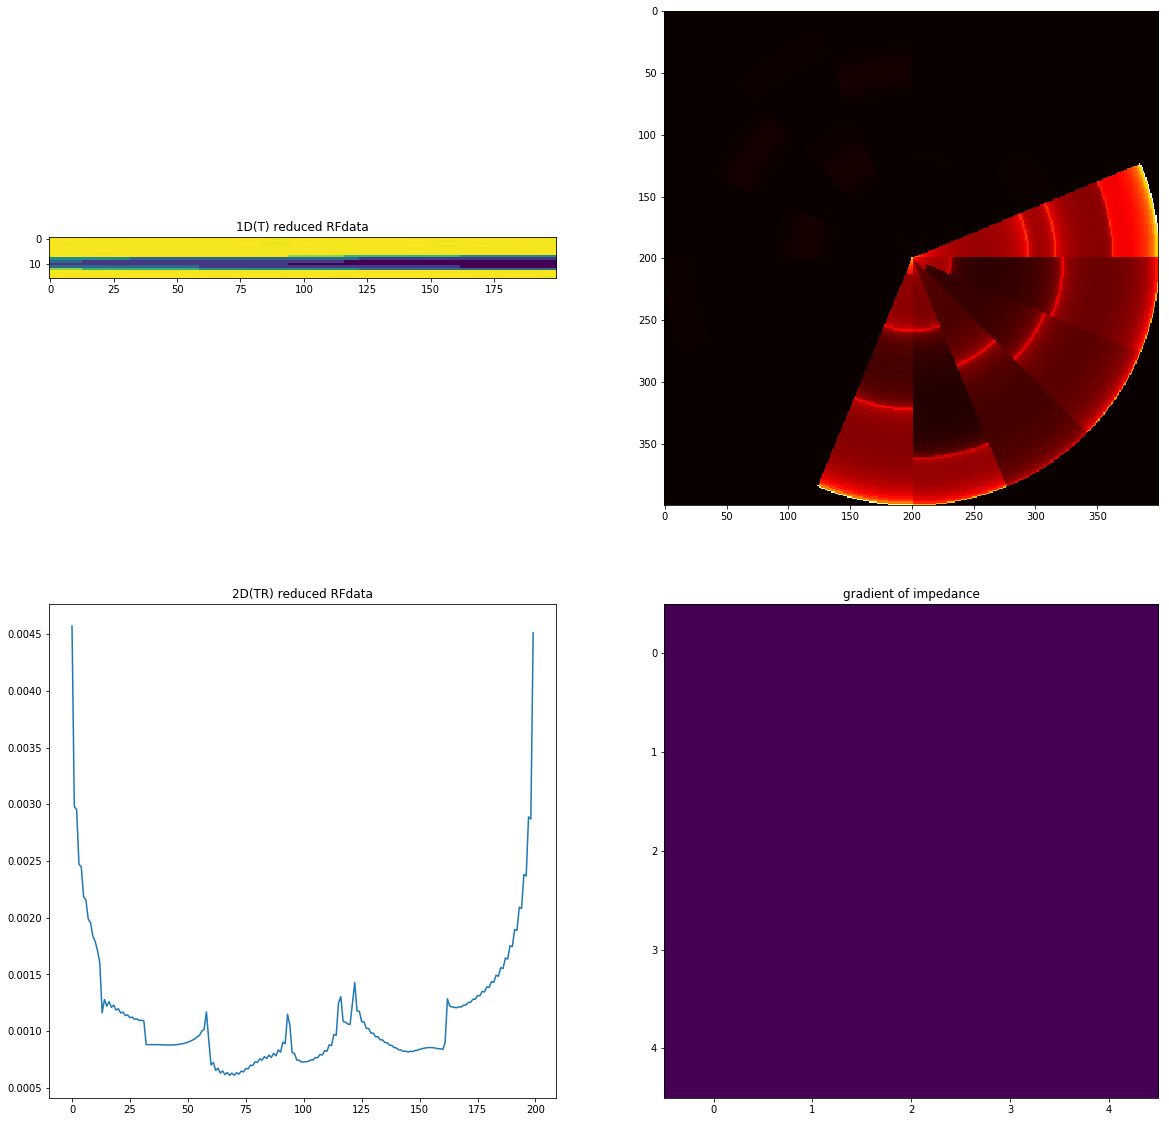

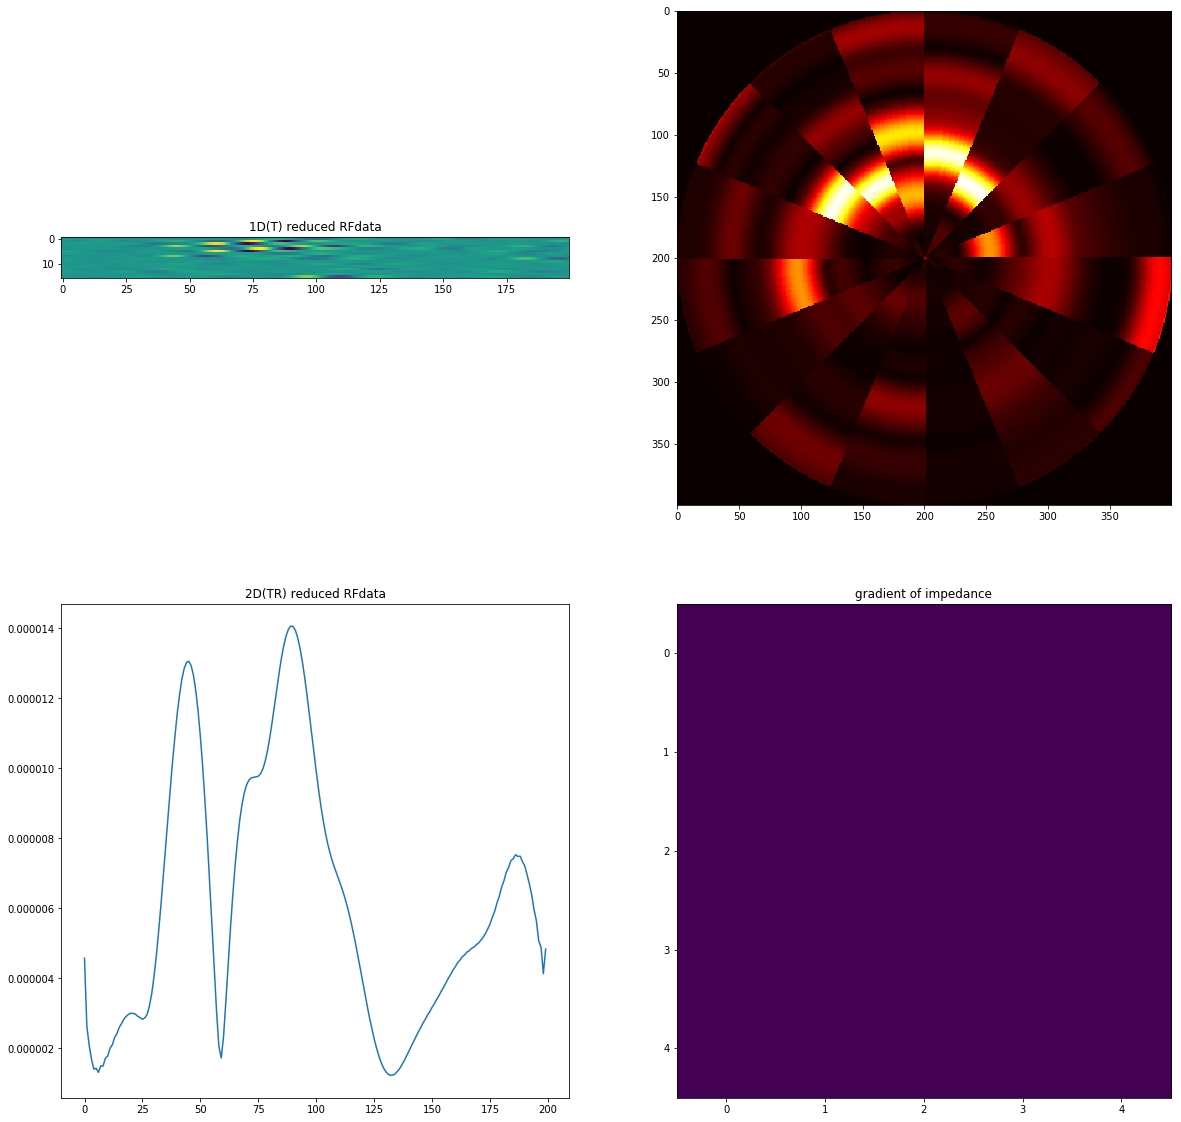

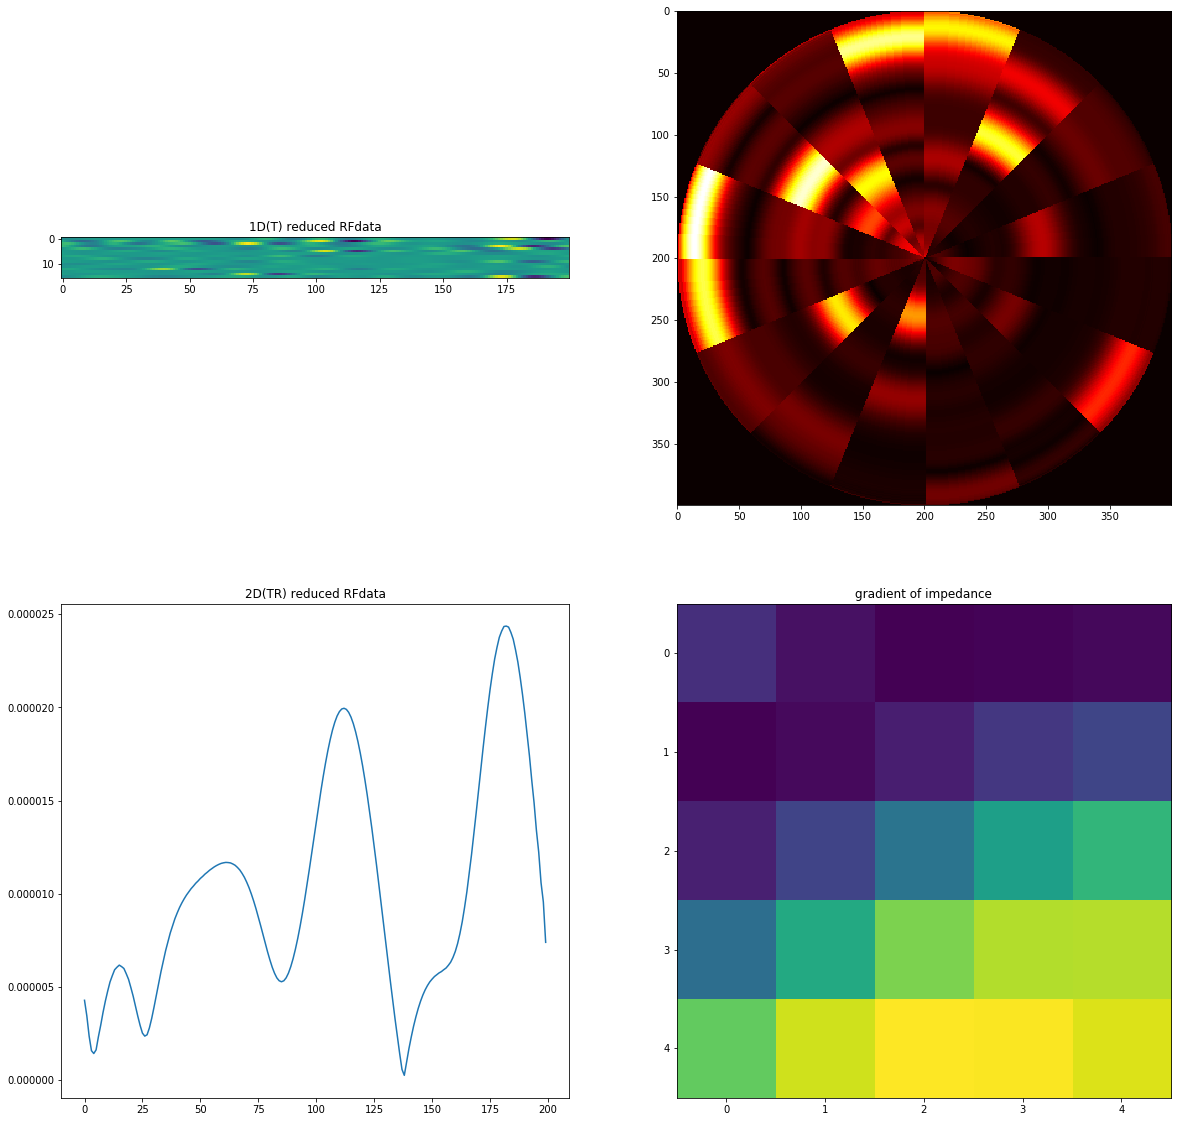

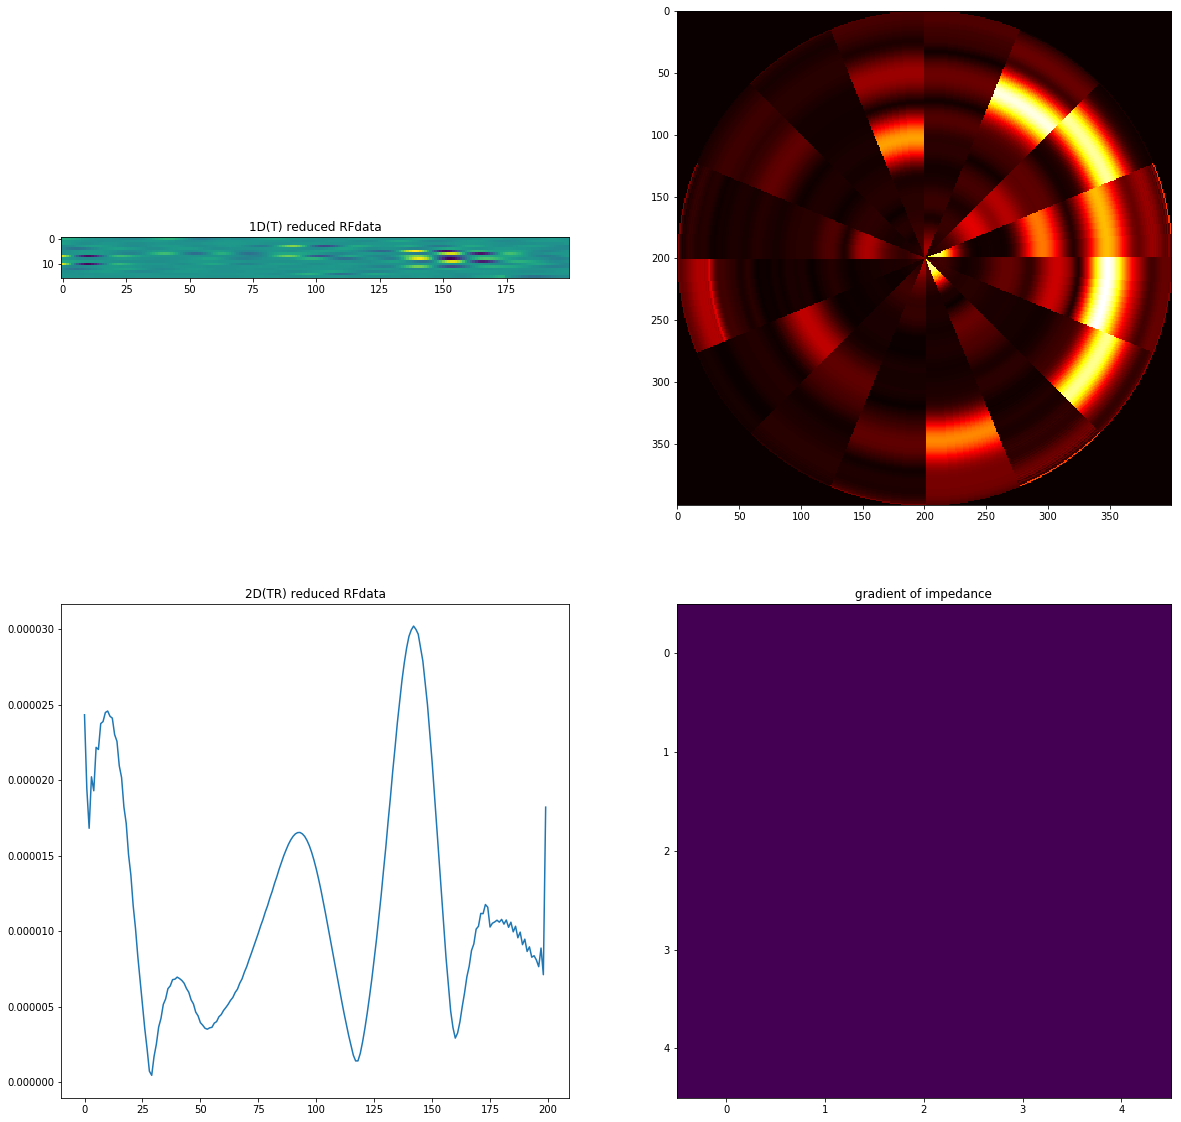

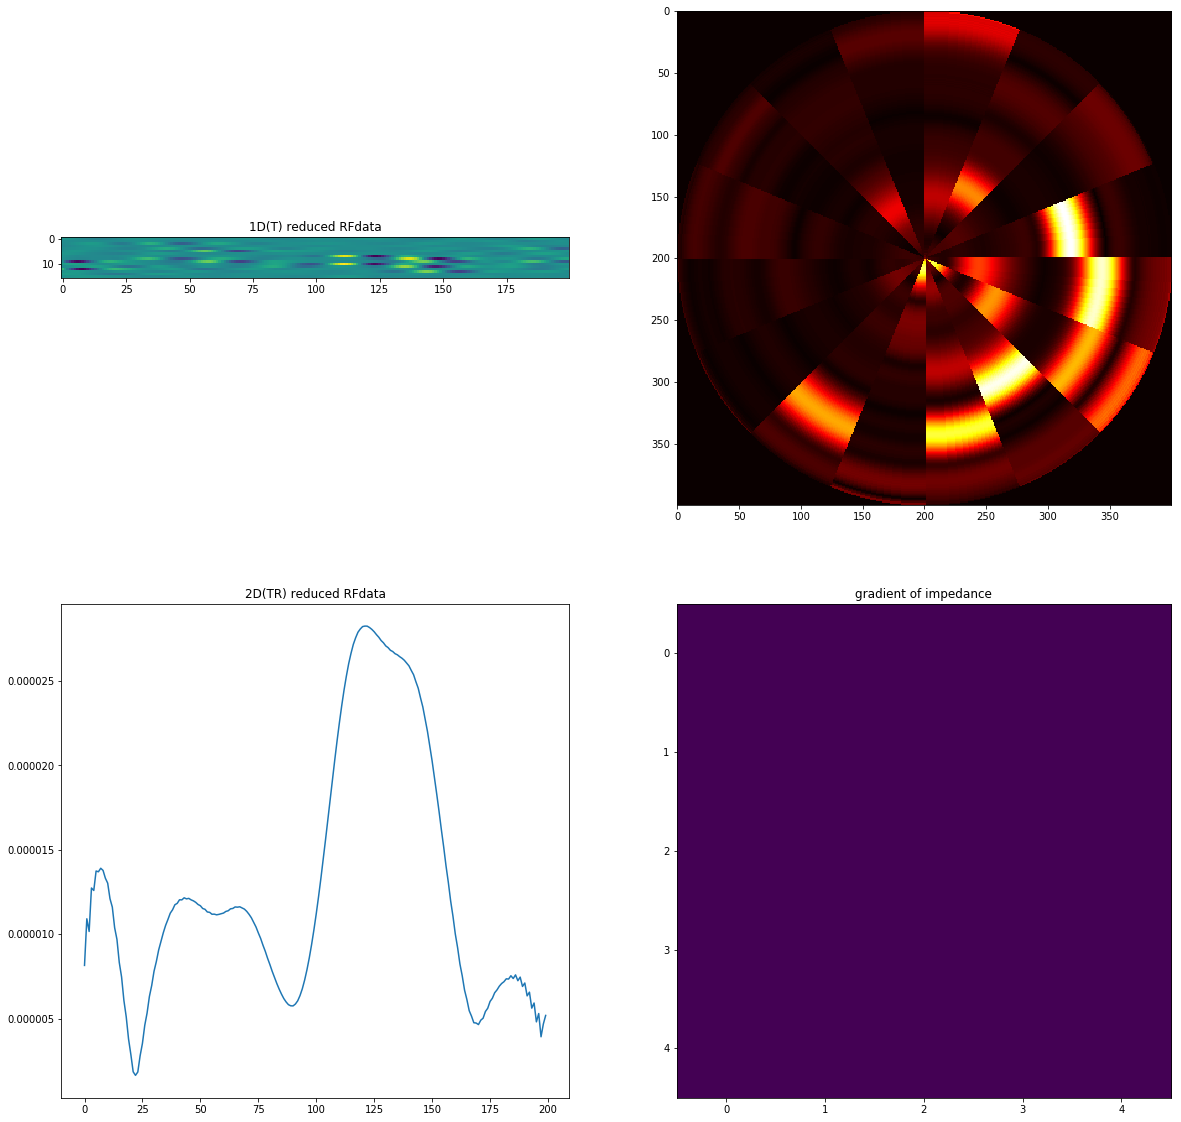

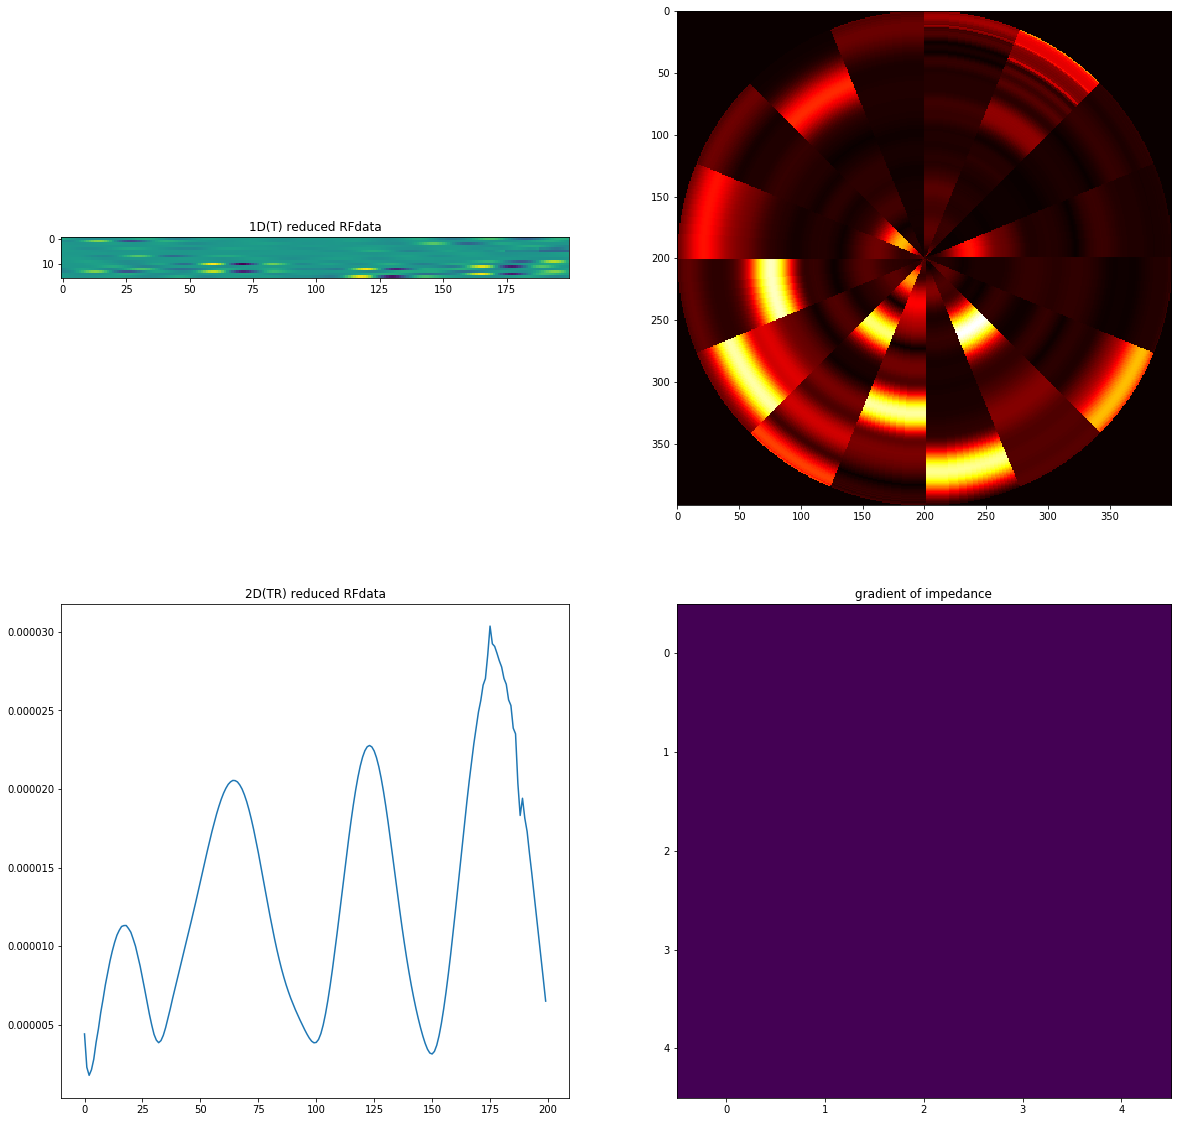

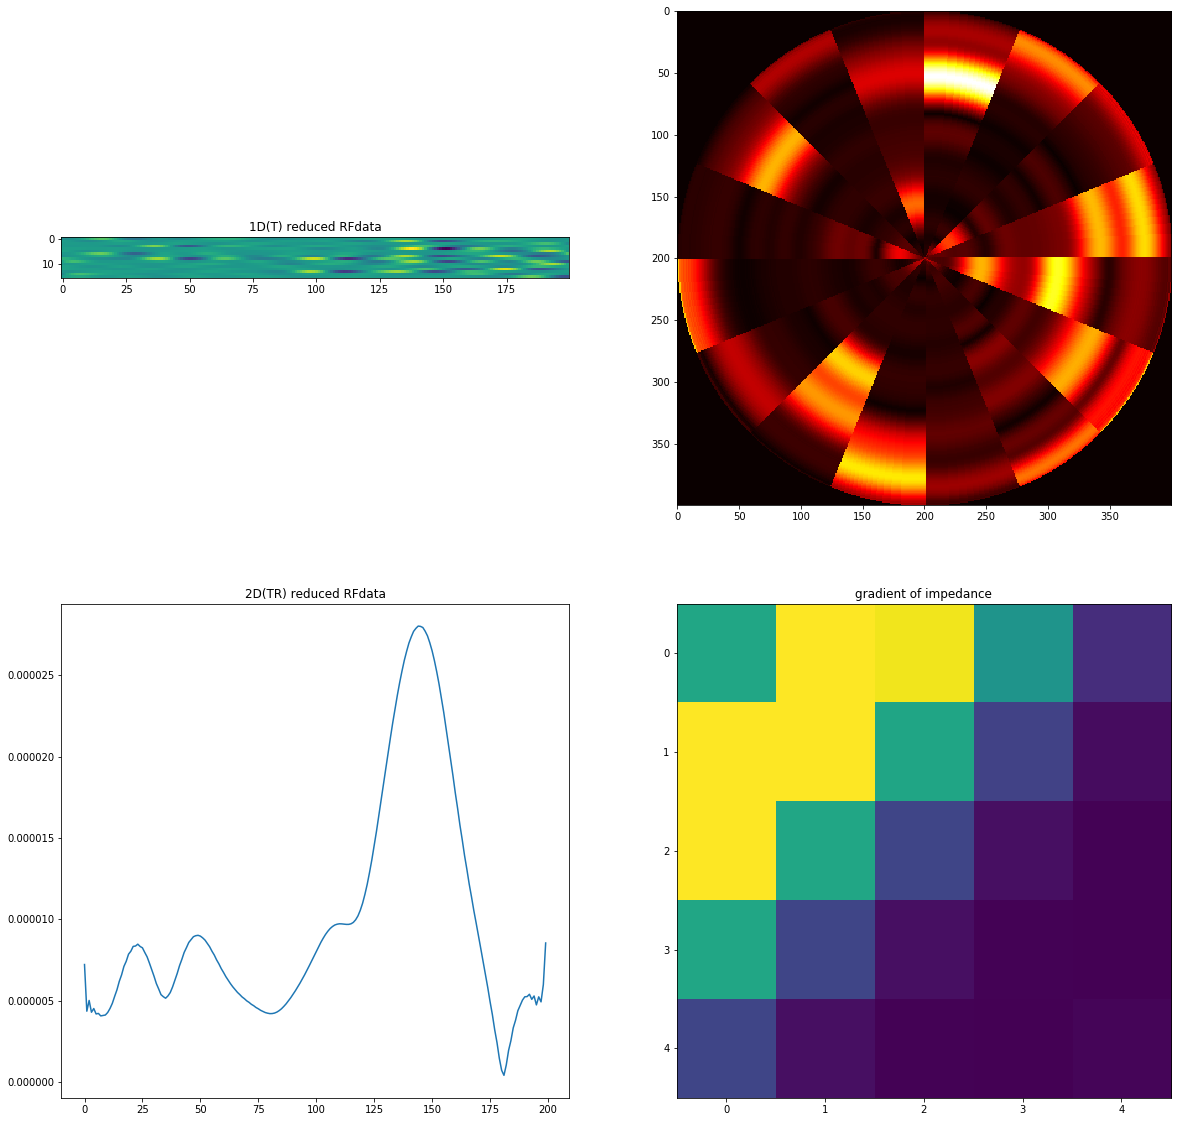

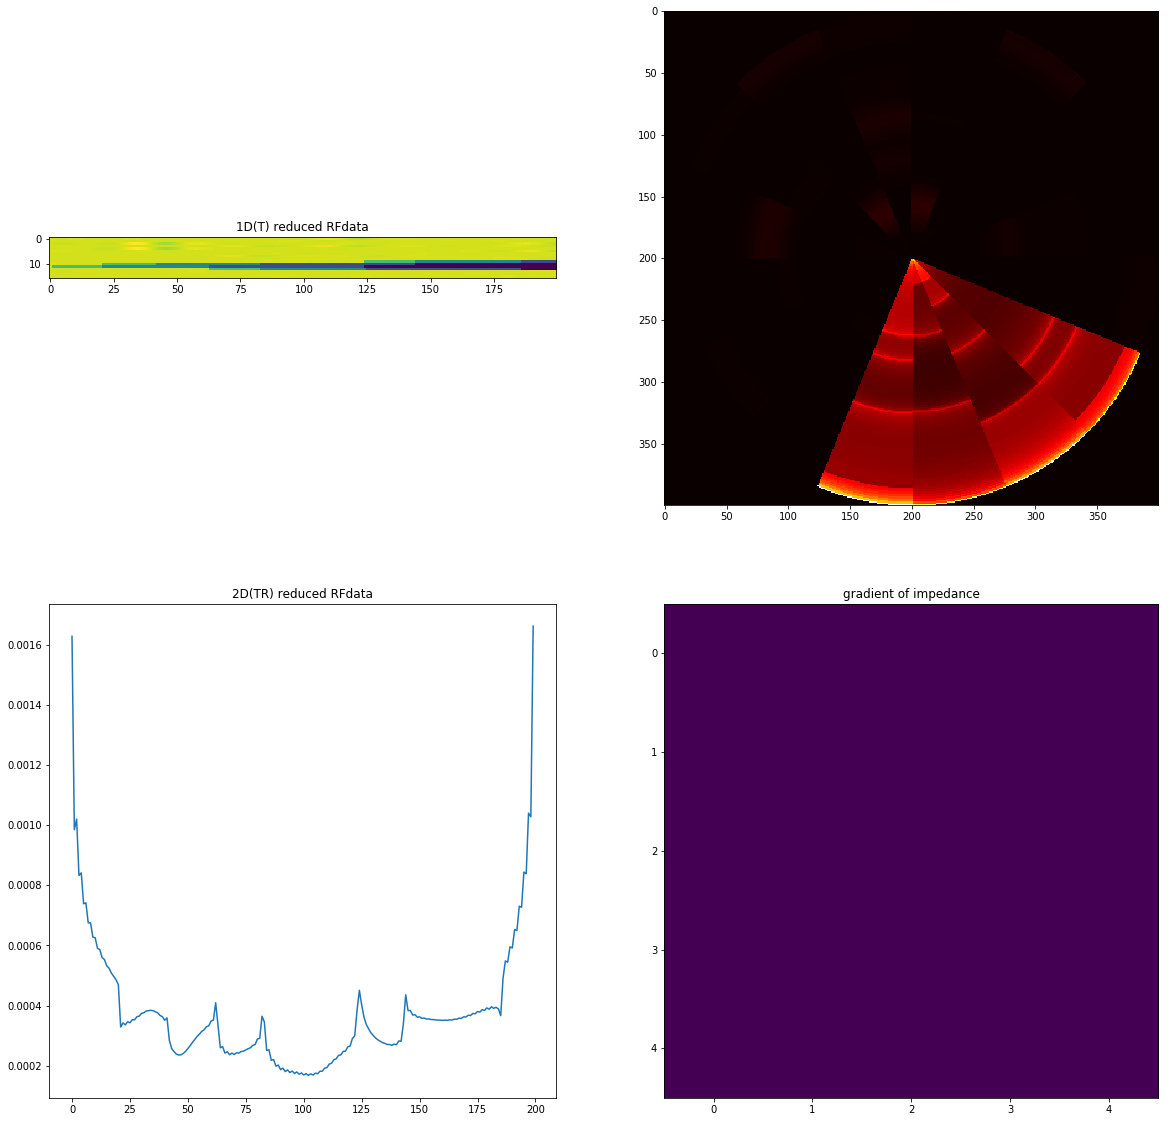

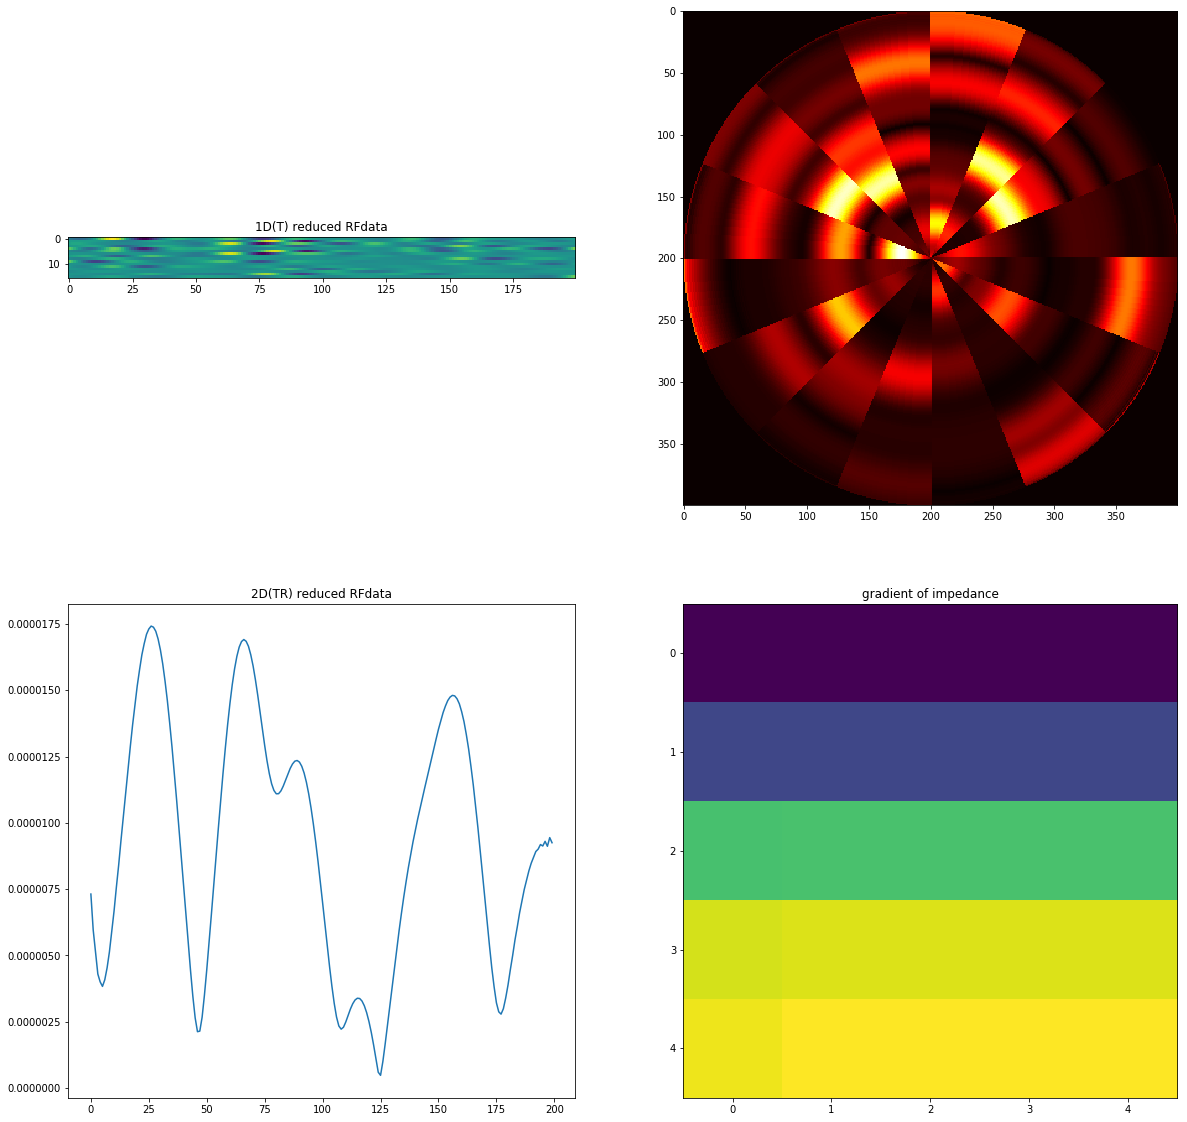

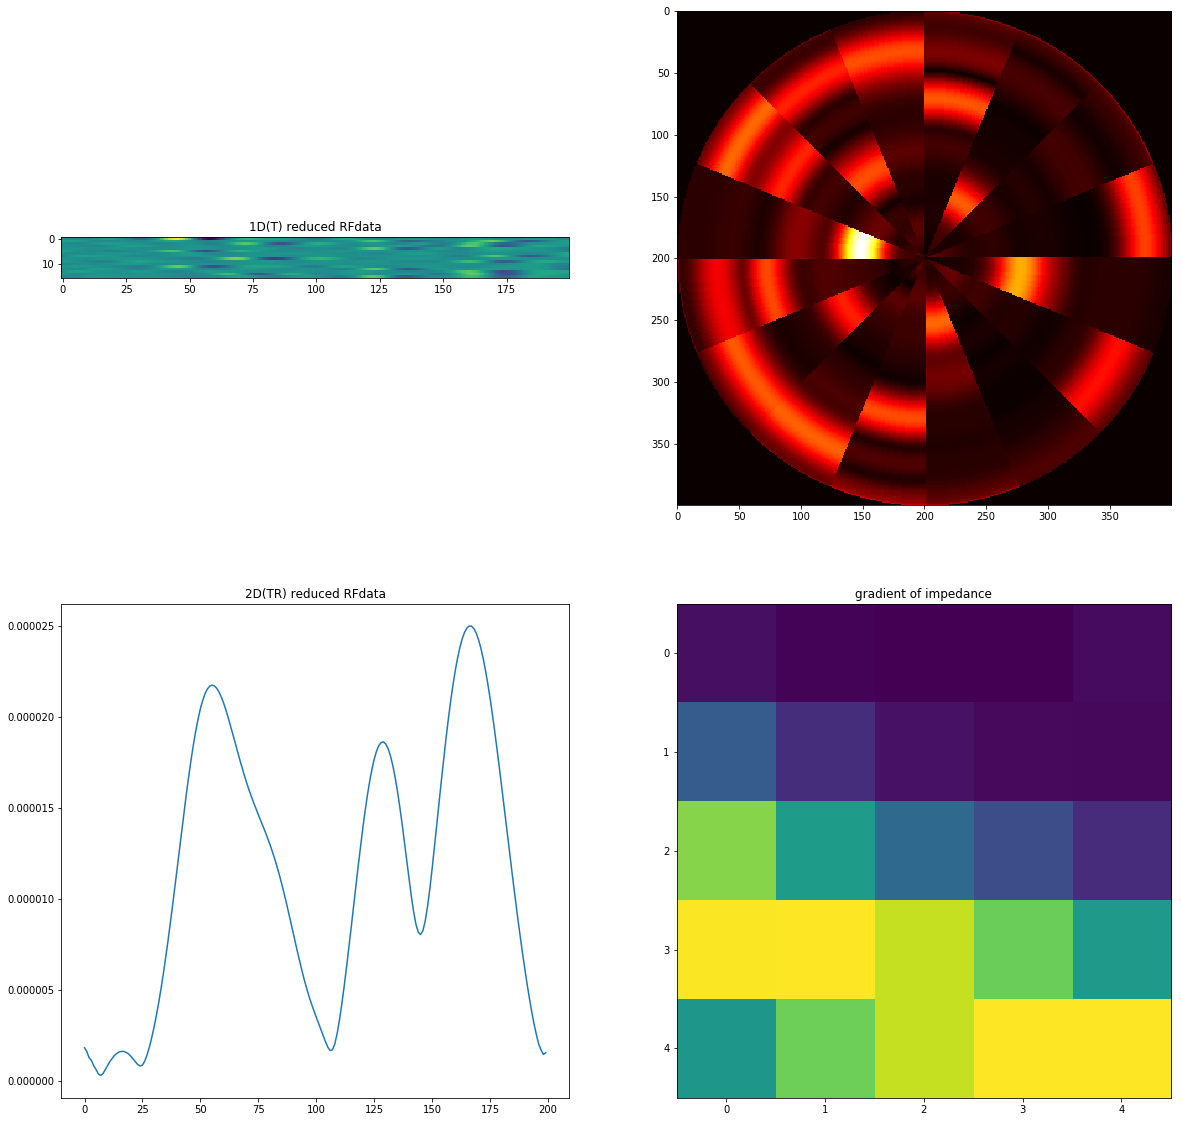

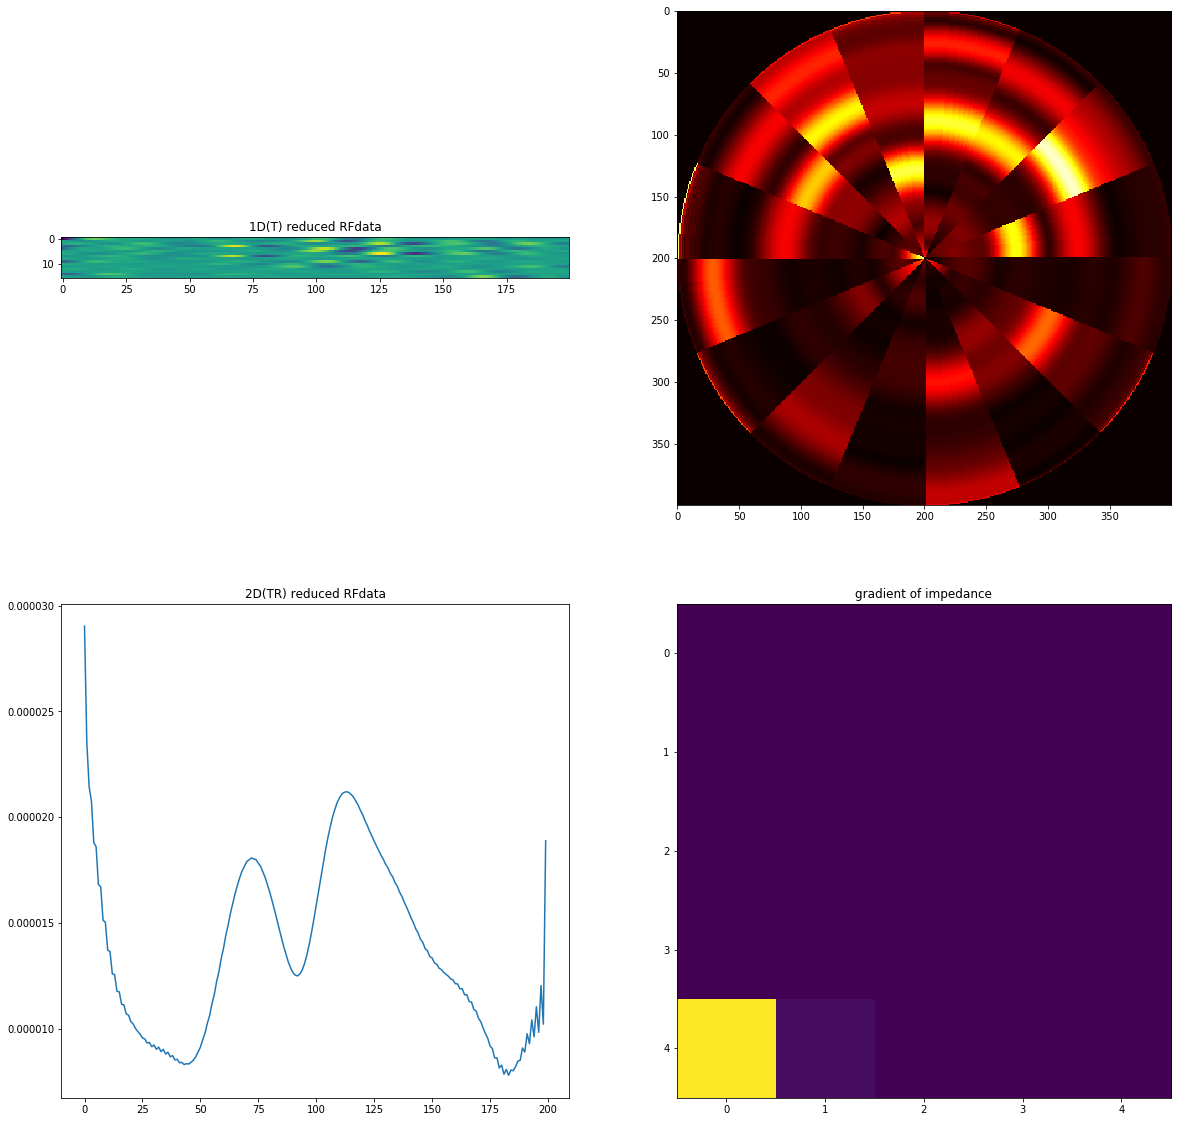

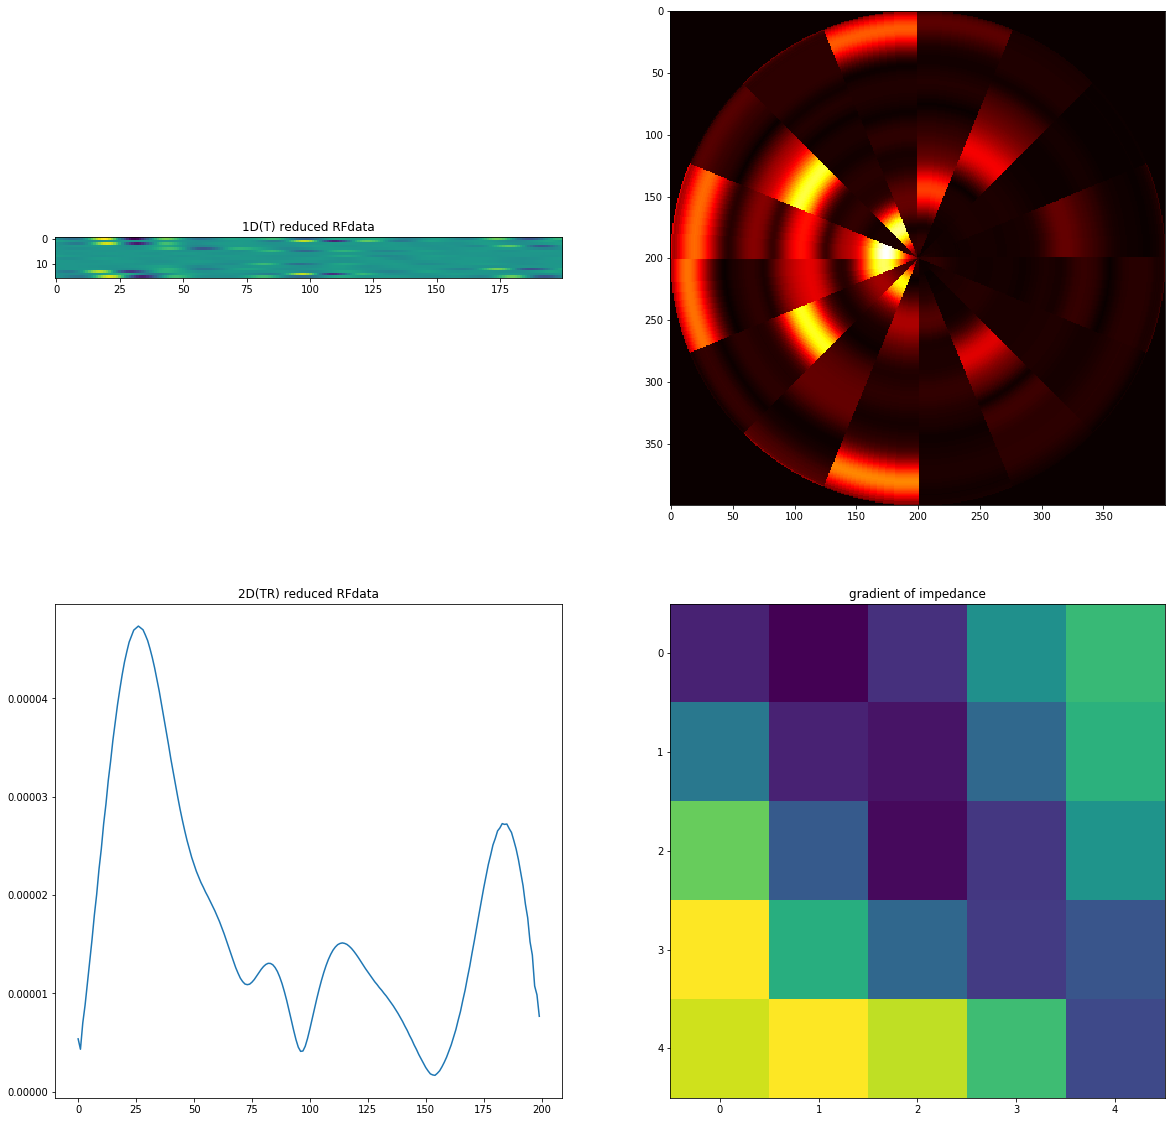

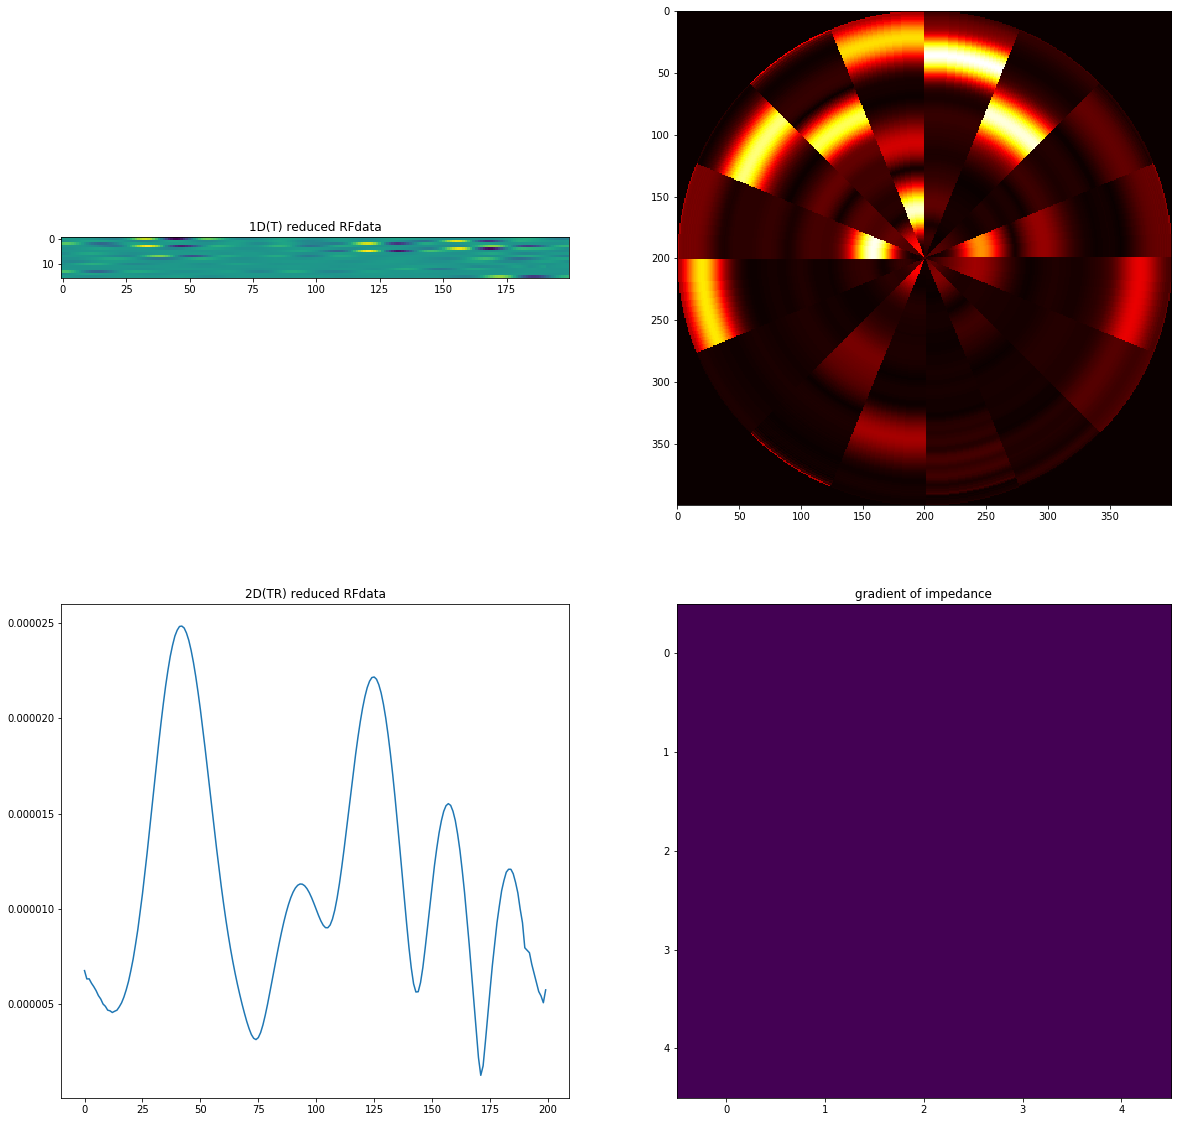

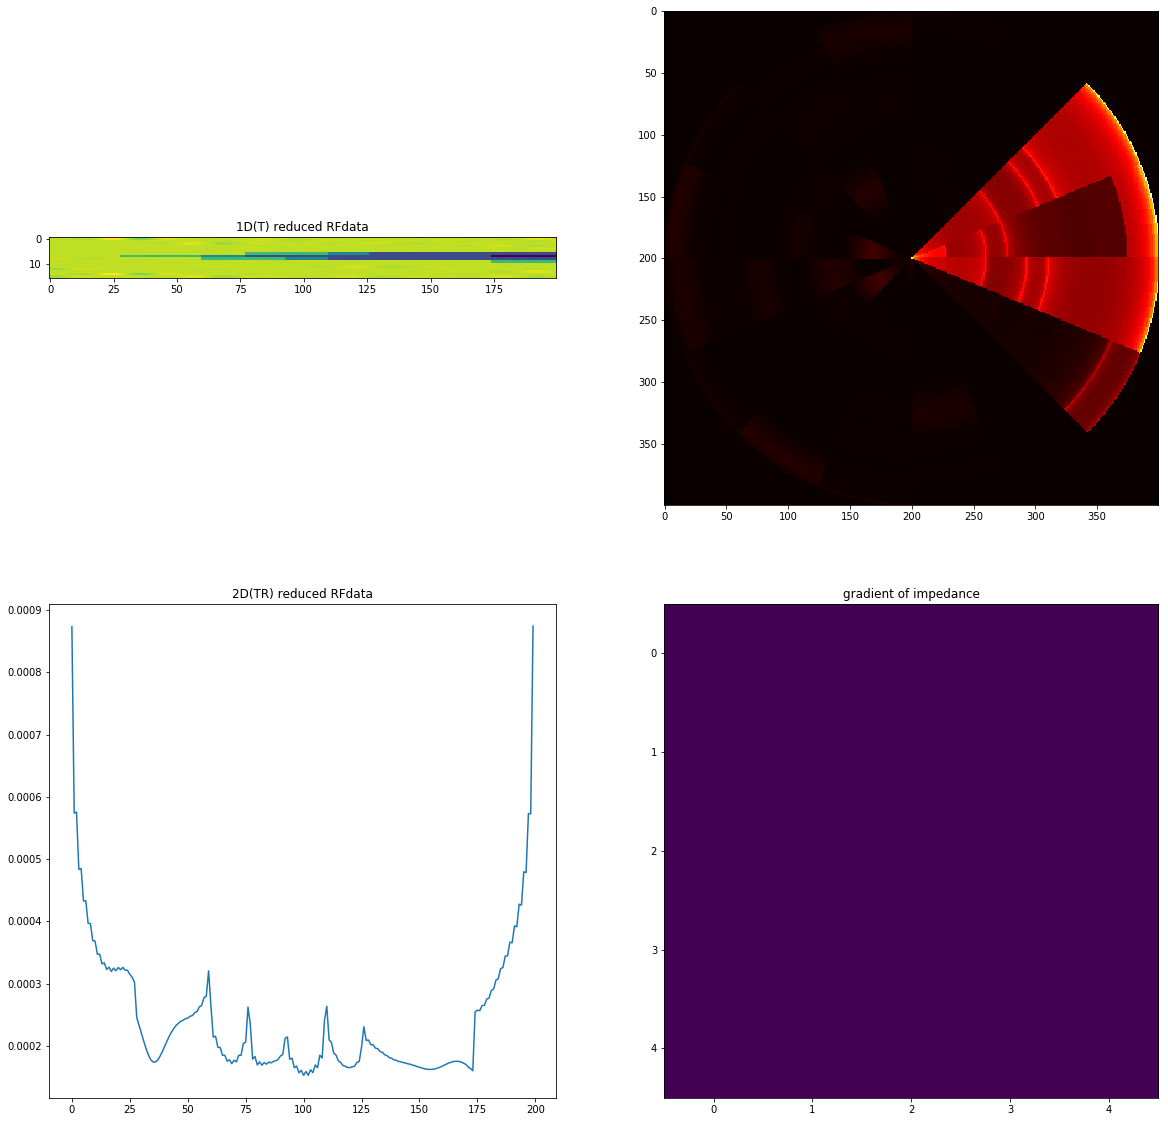

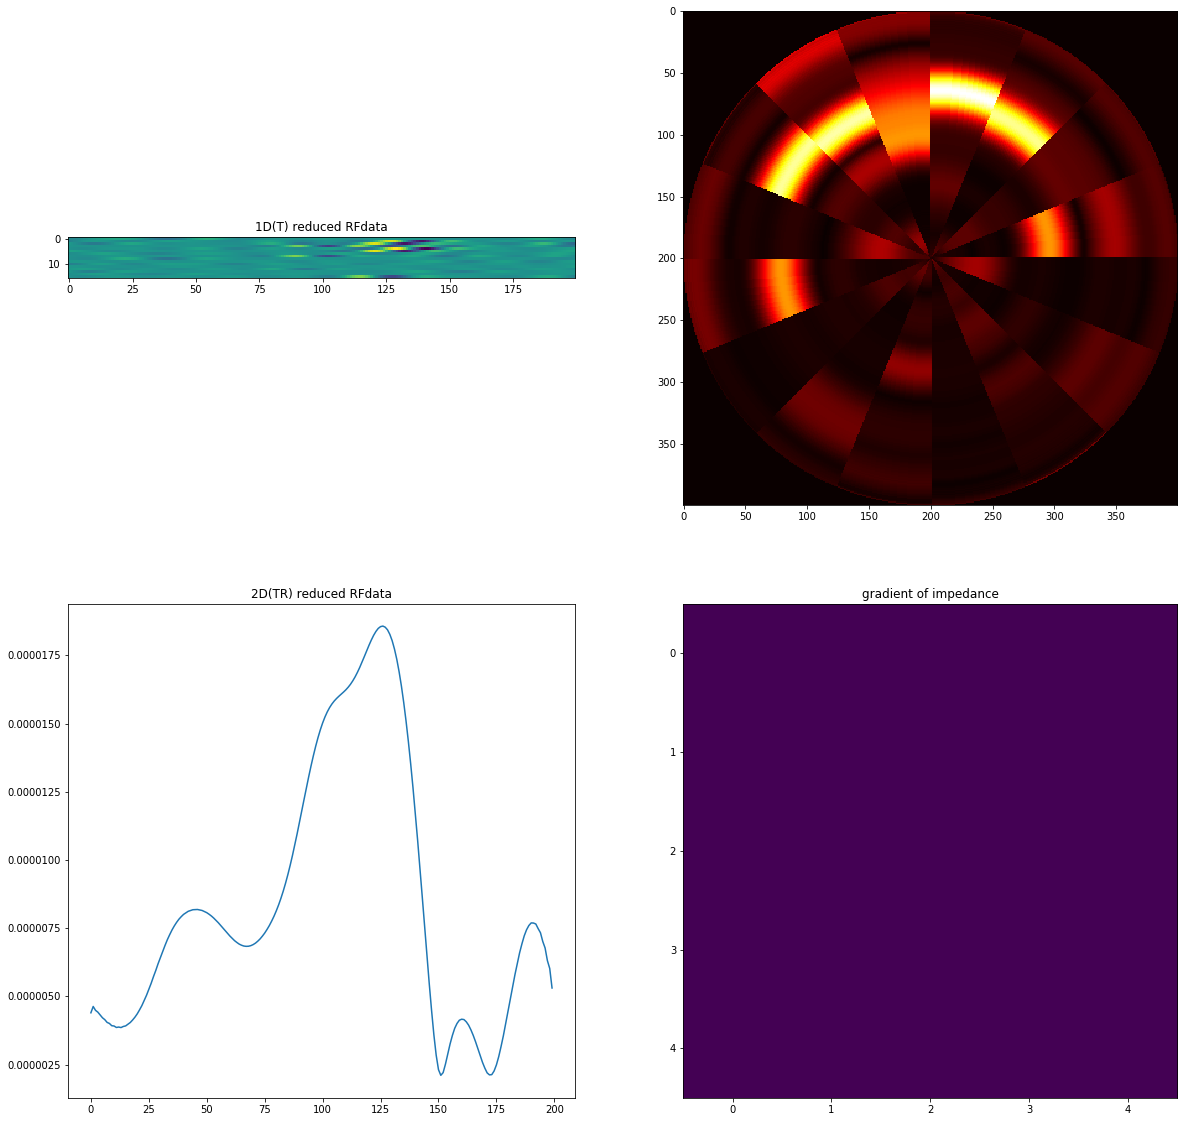

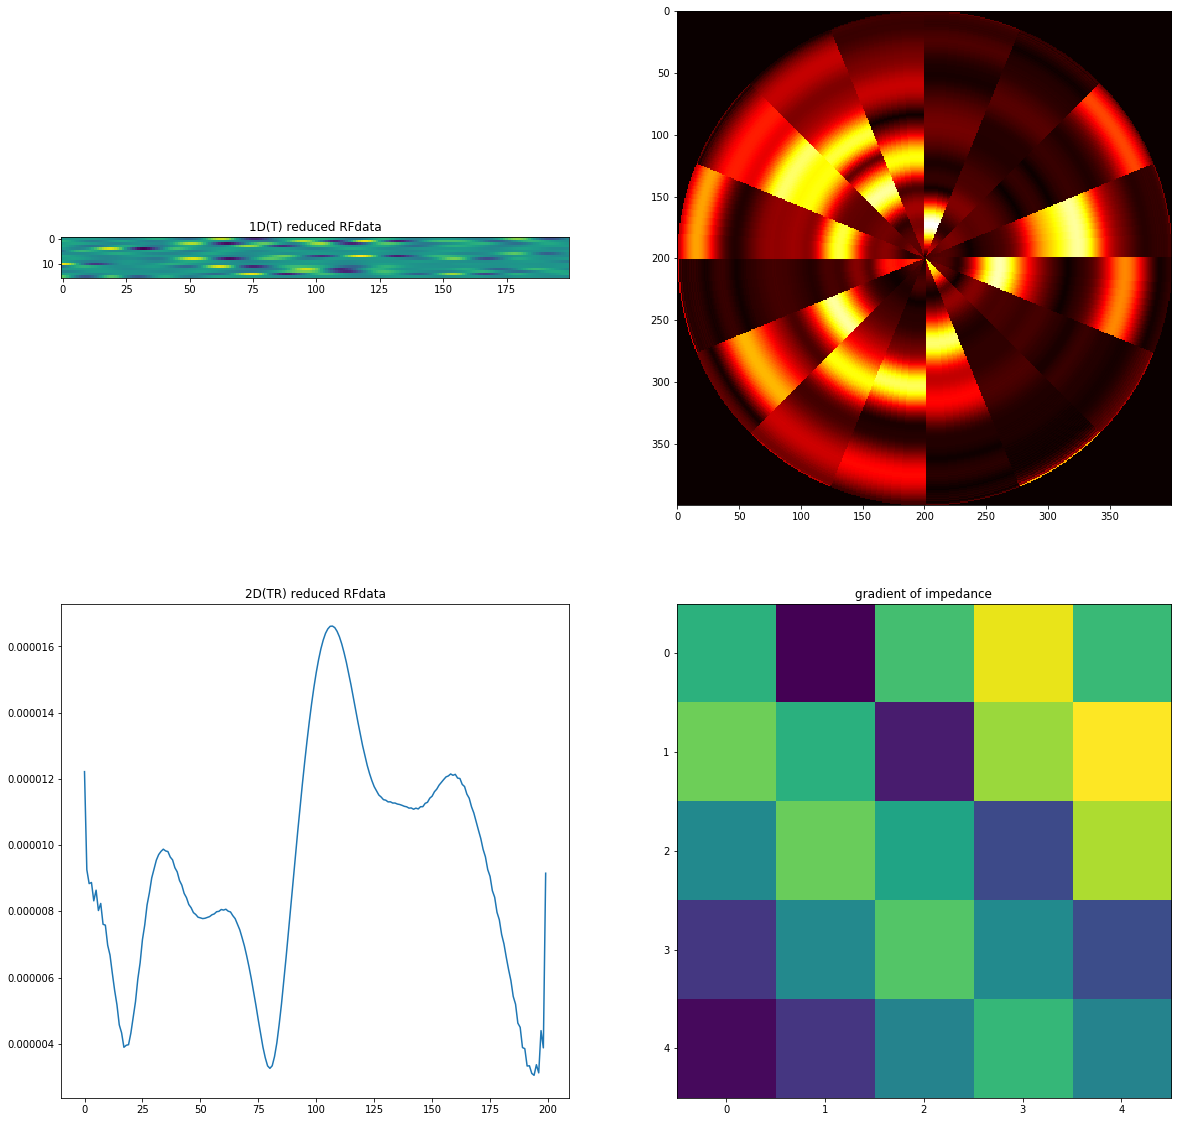

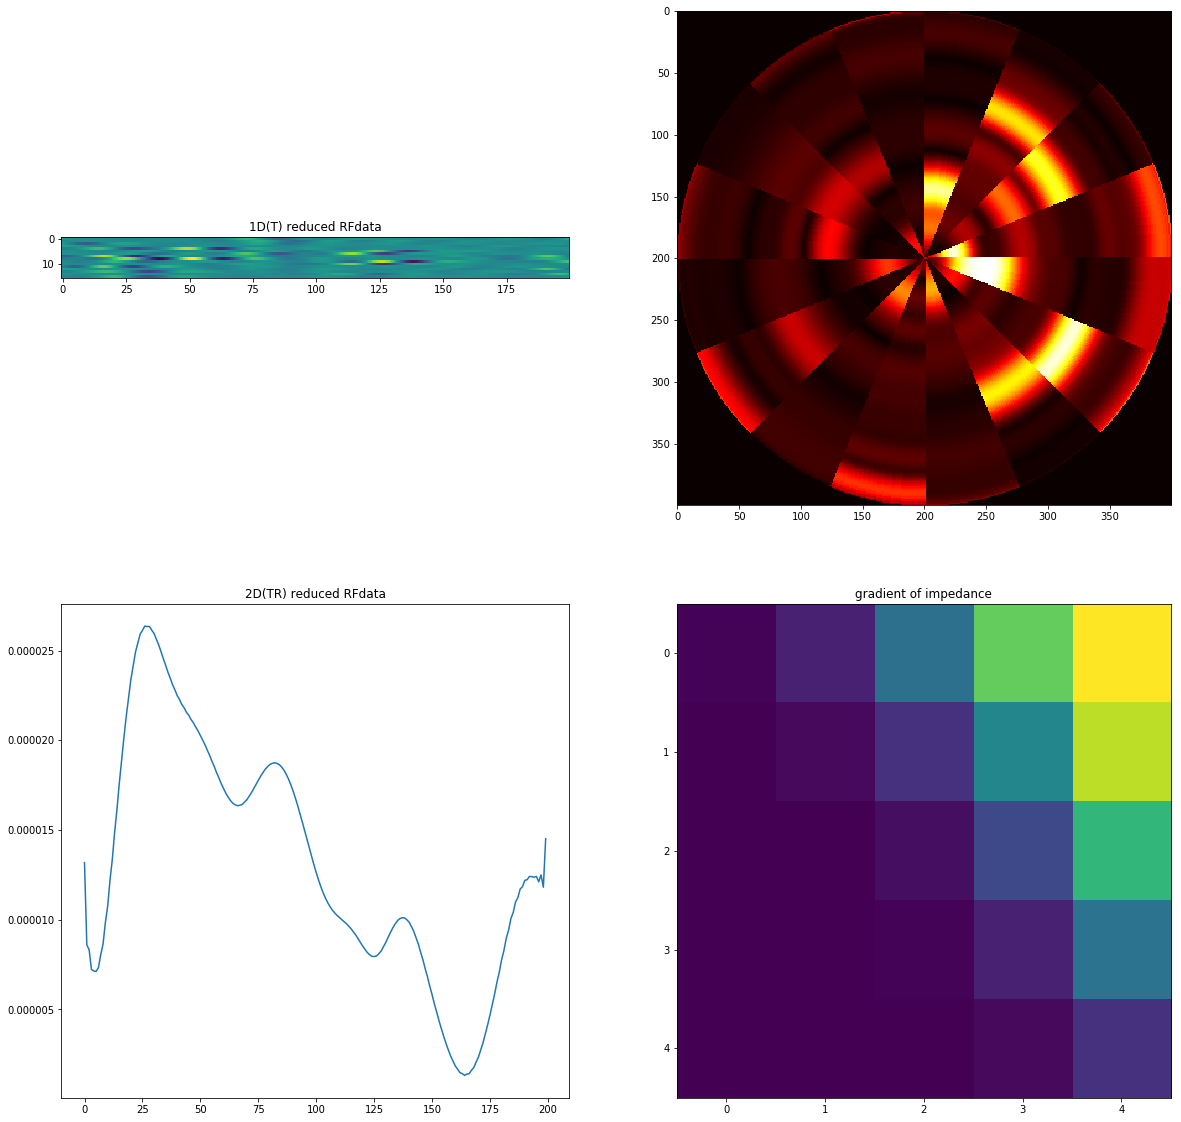

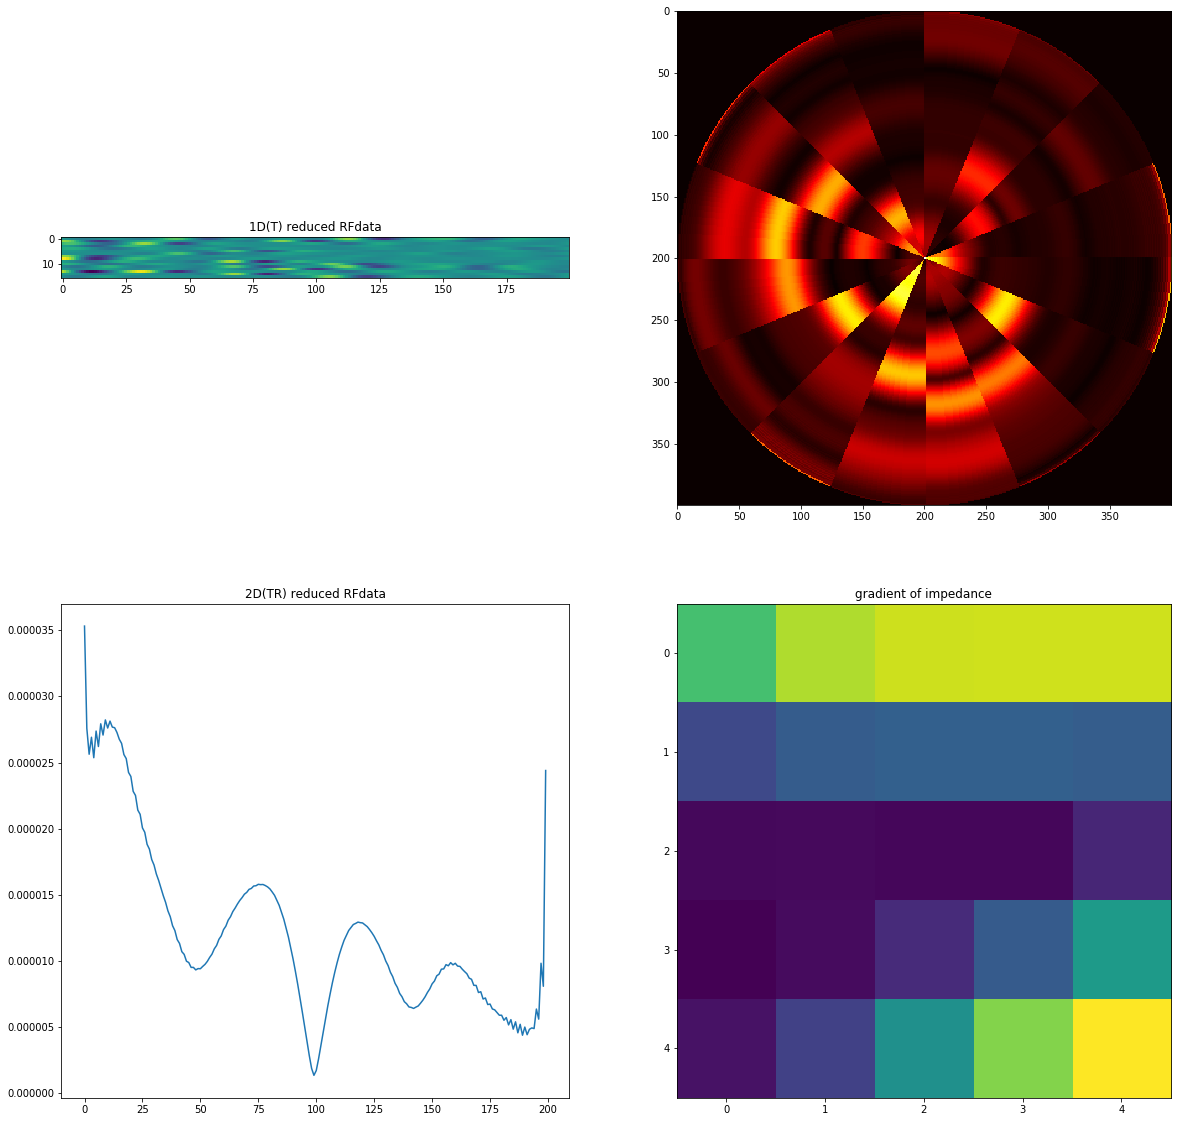

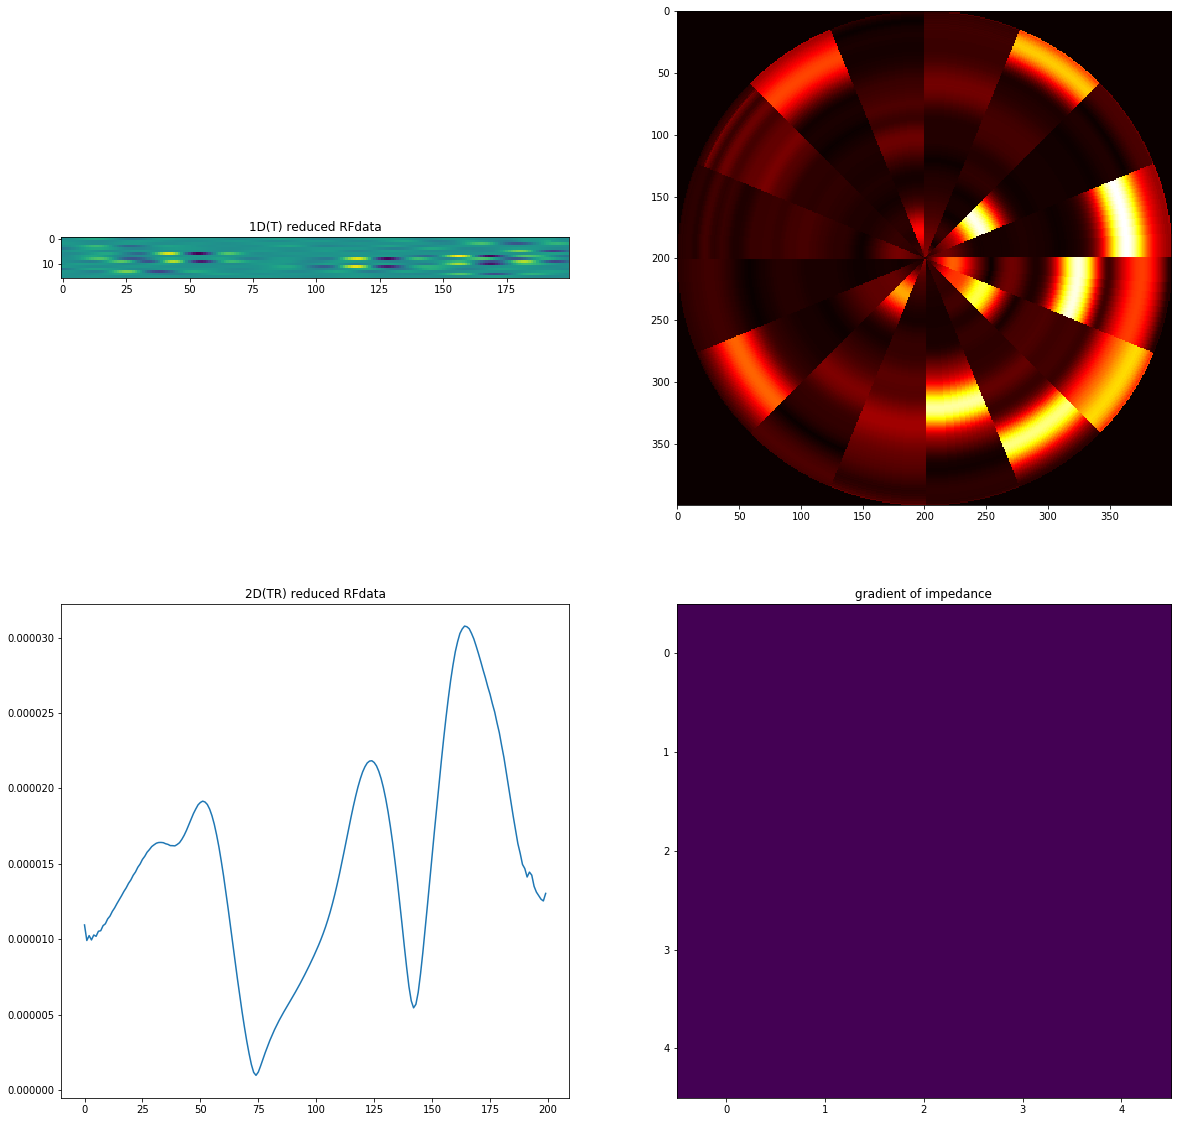

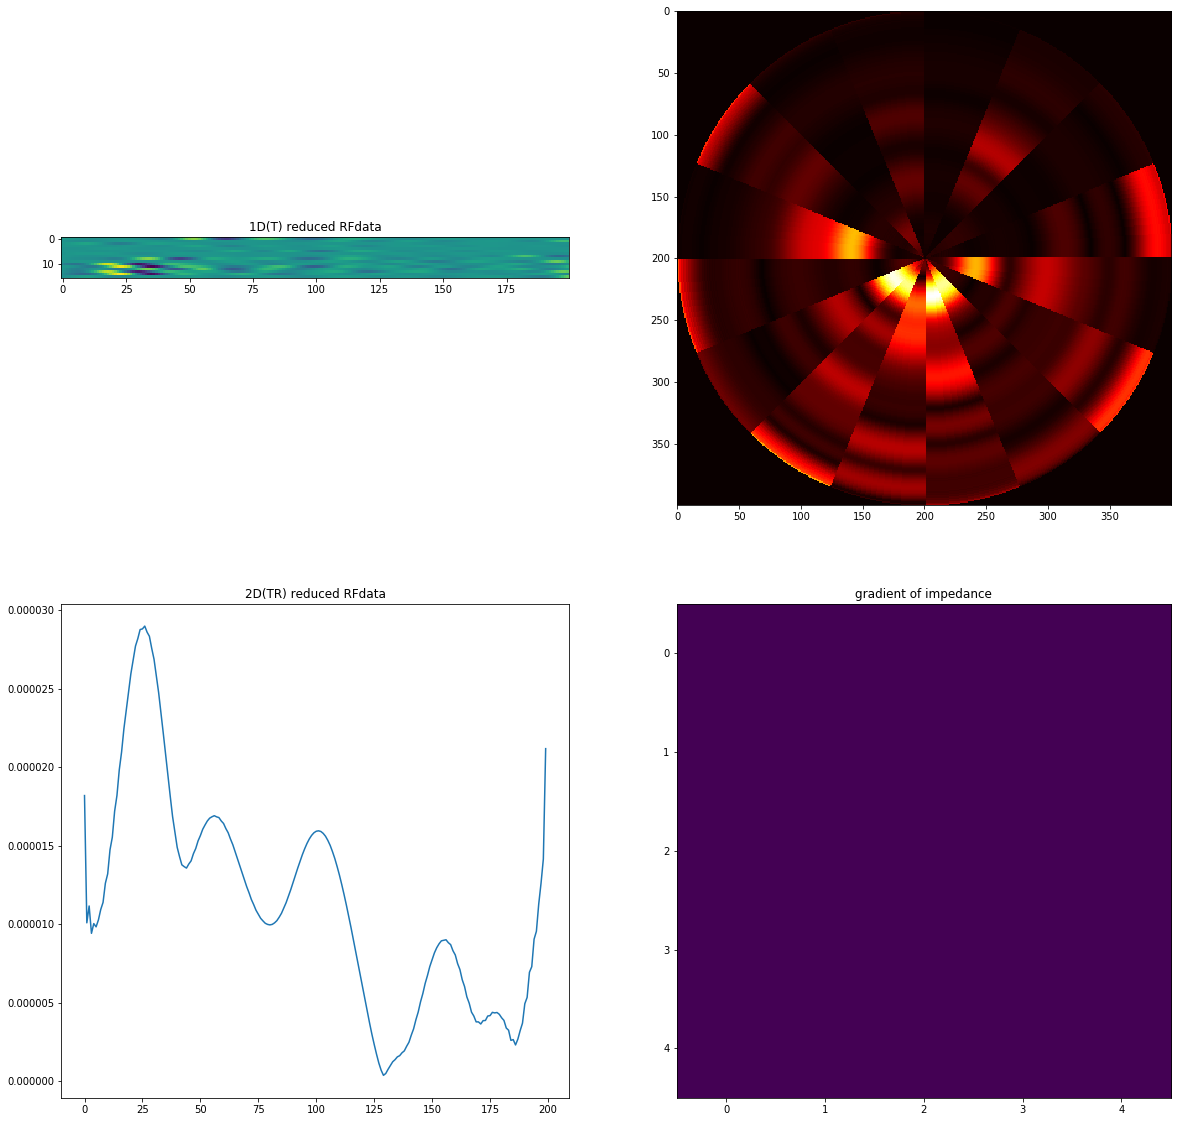

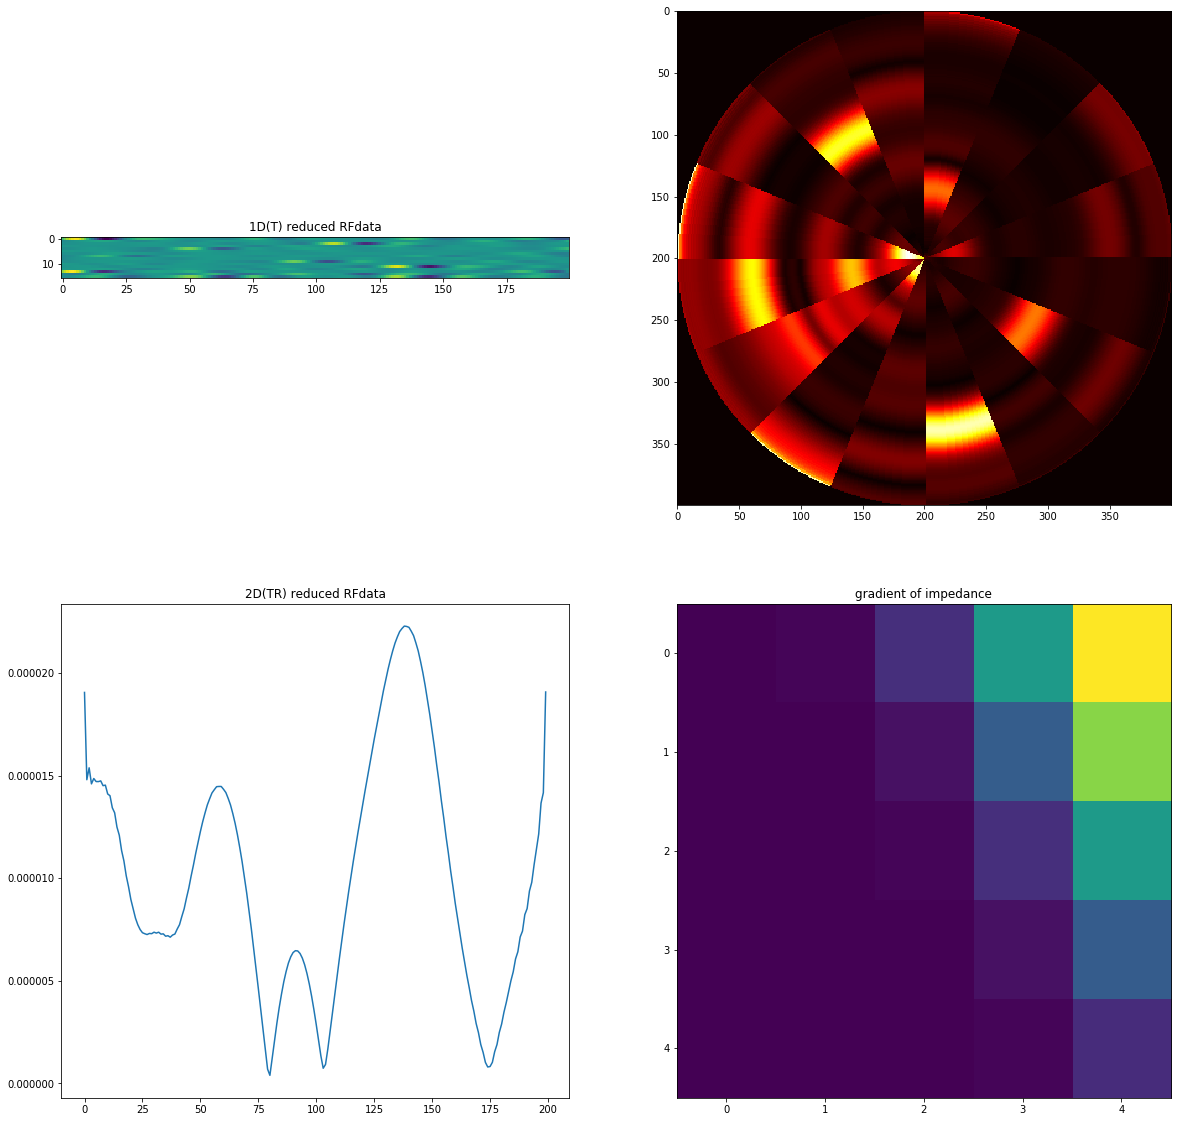

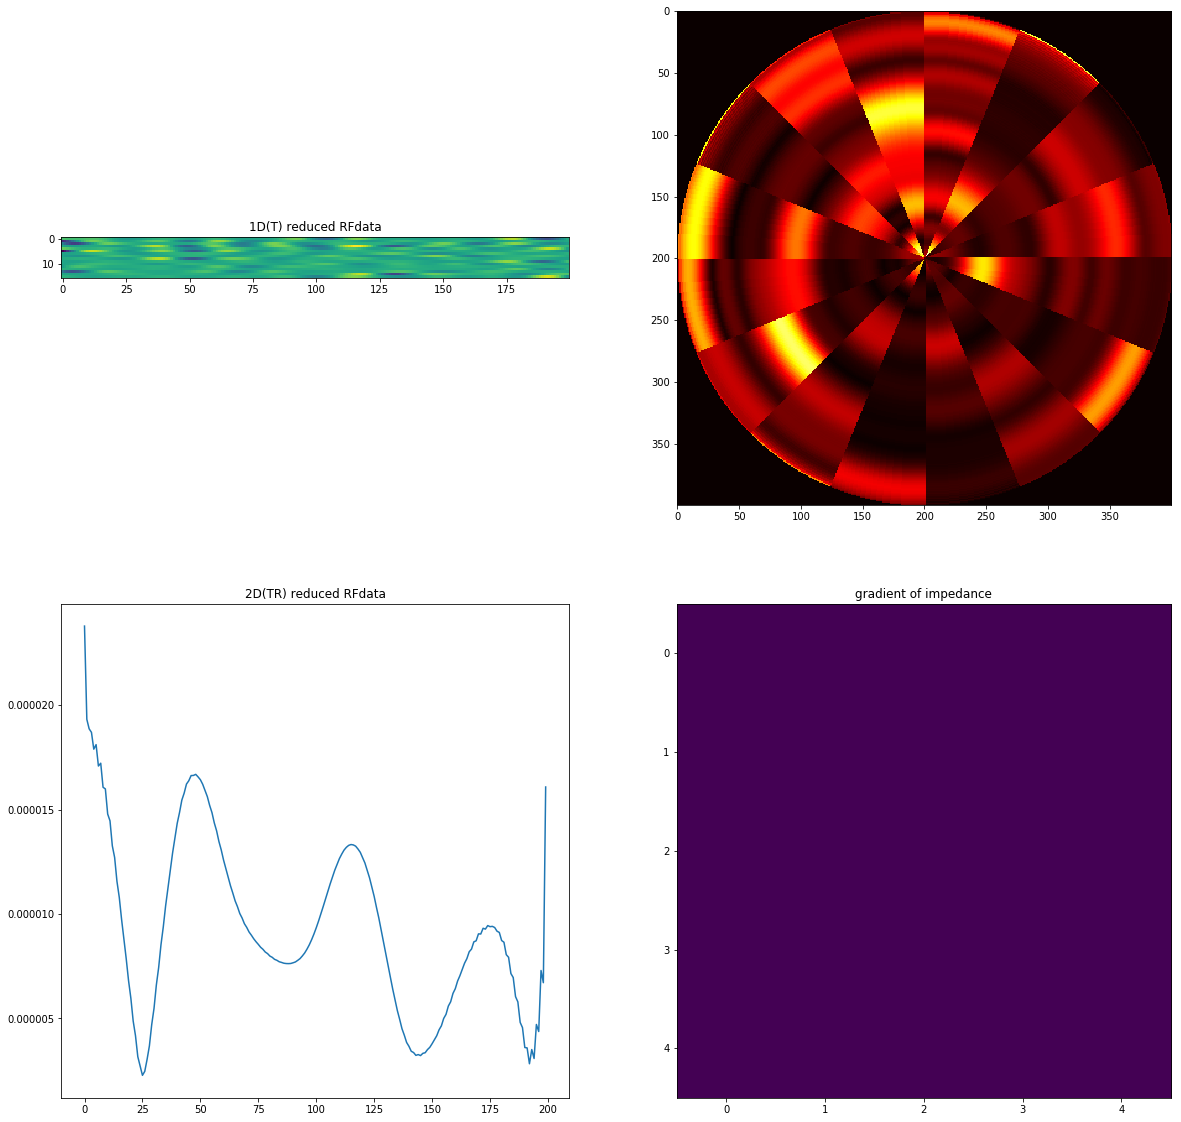

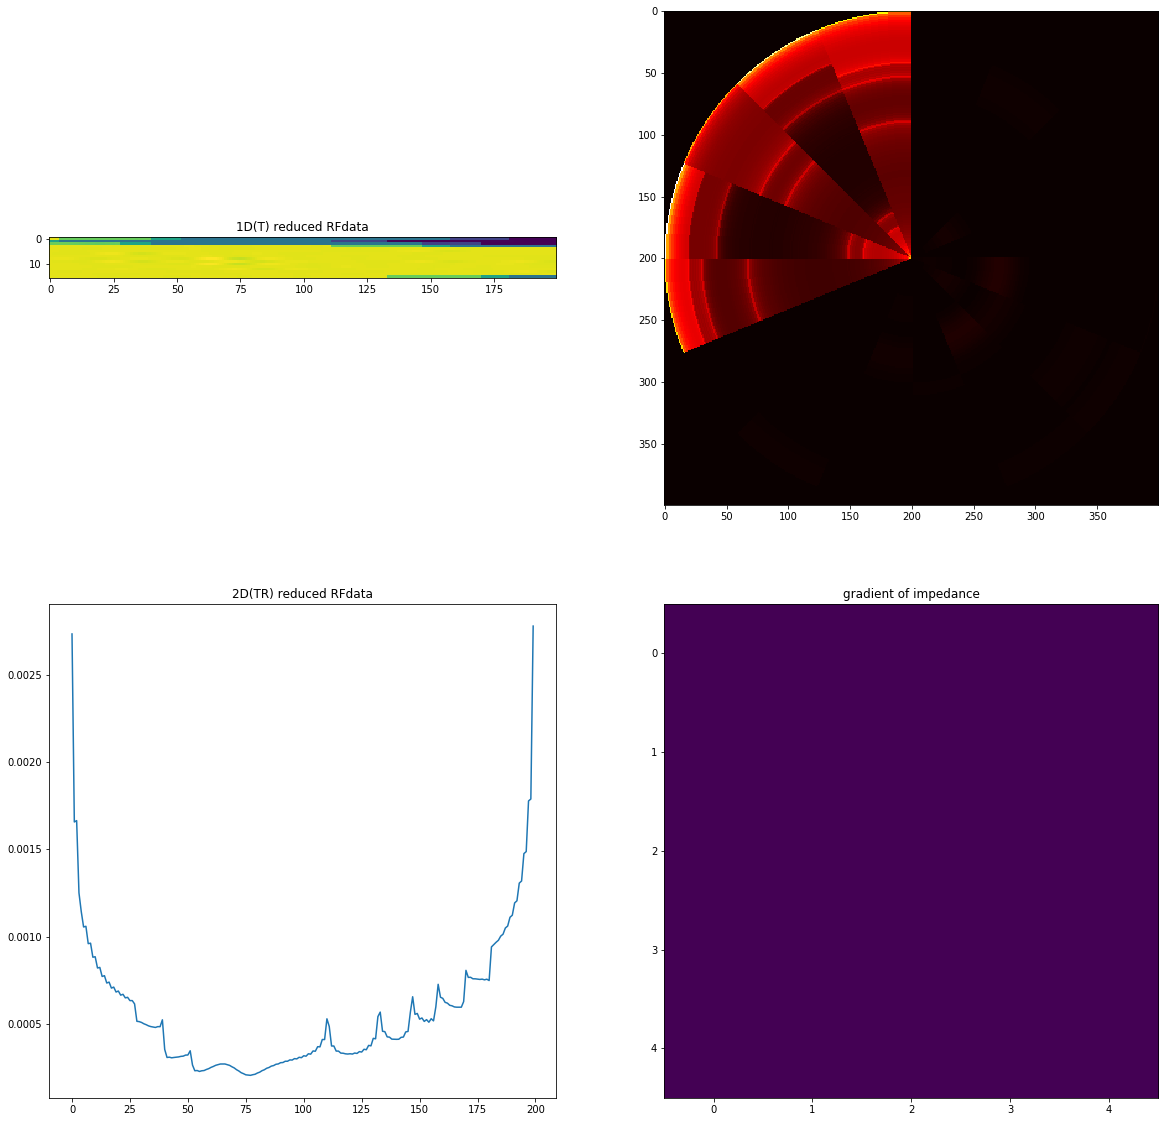

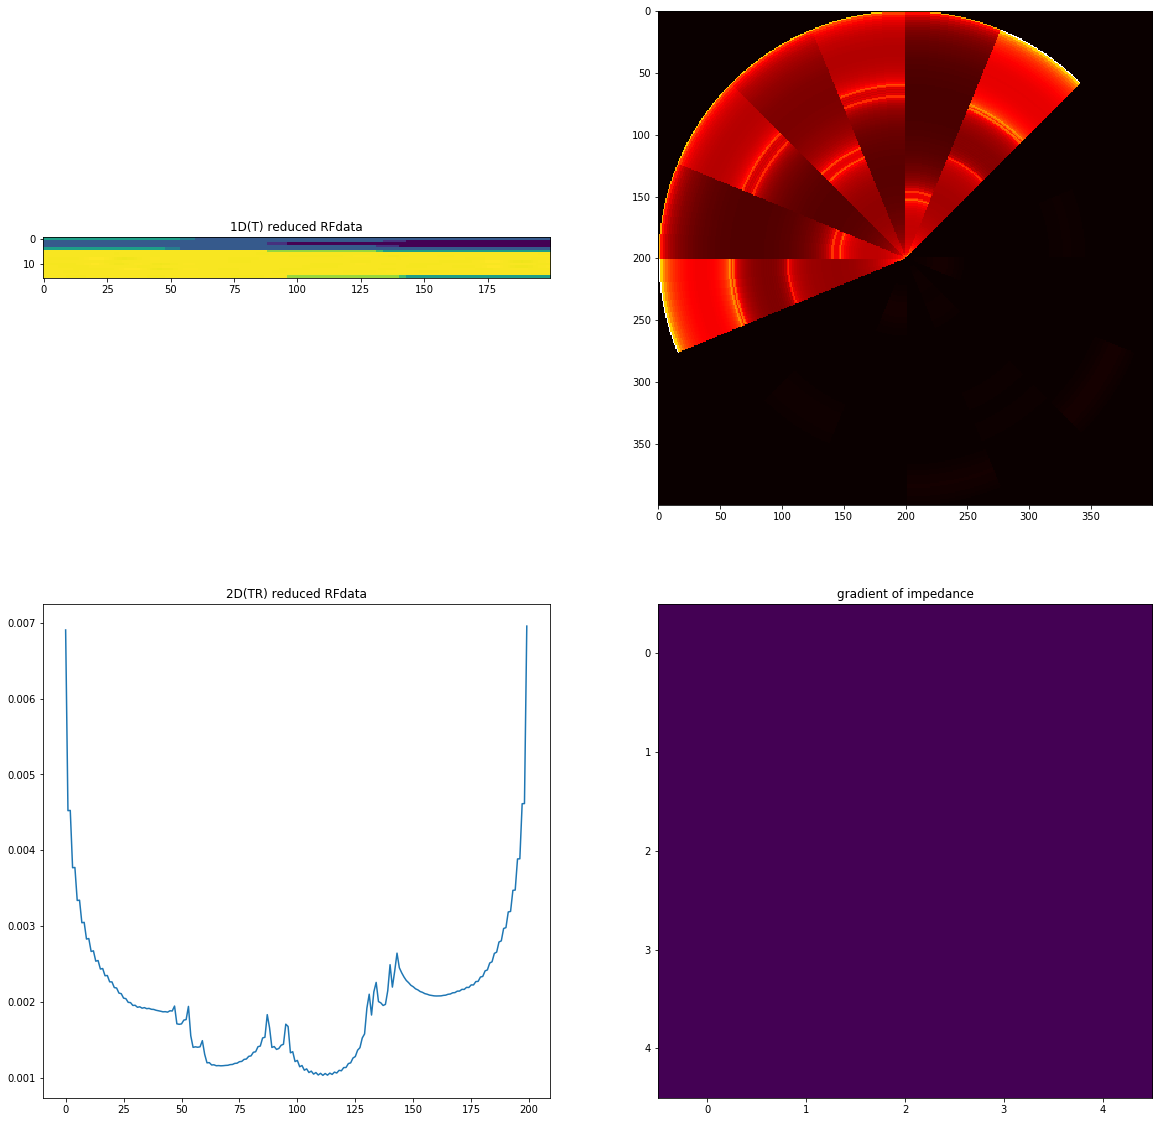

In [71]:
dir_save = os.path.join(dir_dataset, 'image')
if not os.path.exists(dir_save): os.makedirs(dir_save)

for i in range(30):
    
    input_sample = np.load(input_dataset[i])
    output_sample = np.load(output_dataset[i])
    
    input_sample = input_sample[:,::16,:]
    input_sample += (input_sample<np.mean(input_sample)*0.5) * np.mean(input_sample)    
    
    T, R, L = input_sample.shape
    
#     _vmax = input_sample.max()
#     _vmin = input_sample.min()
    _vmax = 0.5685
    _vmin = 0.5675

    
    plt.figure(figsize=(20,20))
    
    plt.subplot(2,2,1)
    img = np.mean(input_sample, axis=0)
    plt.imshow(img, interpolation='nearest')    
    plt.title('1D(T) reduced RFdata')

    plt.subplot(2,2,2)
    img = np.apply_along_axis(func_envelope, 1, np.mean(input_sample, axis=0))
    plt.imshow(translate_circular(img), interpolation='nearest', cmap='hot')
    
    plt.subplot(2,2,3)
    ts = np.mean(np.mean(input_sample, axis=0), axis=0)
#     plt.plot(ts)
    plt.plot(func_envelope(ts))
#     plt.ylim([_vmin, _vmax])
    plt.title('2D(TR) reduced RFdata')
    
    plt.subplot(2,2,4)
    plt.imshow(output_sample, interpolation='nearest')
    plt.title('gradient of impedance')

    plt.savefig(os.path.join(dir_save, '{0:0>8}.png'.format(i)))
    
        